# Tumor Size Staging, Lymph Node Status and Metastasis Status (TNM) Prediction with Existing Lymph Node Status

In [1]:
import pandas as pd
import numpy as np
dataset = pd.read_csv('Modified_breast_cancer_numeric_data___.csv') ##Reduced_Modified_breast_cancer_data2.csv
dataset.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  
0                 1                  0             2          7  
1                 1                  0             2          7  
2                 1                  0             3          0  
3                 1                  0             3          0  
4                 1                  1             4          3

In [2]:
import pandas as pd

# Update the TNM T Stage categorization based on Diagnosis_Status
# Assuming that Diagnosis_Status is 1 for malignant and 0 for benign

def update_tnm_stage(row):
    size_mm = row['Tumor_Size_mm']  # Access Tumor_Size_mm from the row
    if row['Diagnosis_Status'] == 0:  # Benign
        return "T0"
    else:  # Malignant
        if pd.isna(size_mm):
            return "TX"  # Tumor size not assessable
        elif size_mm <= 1:
            return "T1mi"
        elif size_mm <= 5:
            return "T1a"
        elif size_mm <= 10:
            return "T1b"
        elif size_mm <= 20:
            return "T1c"
        elif size_mm <= 50:
            return "T2"
        elif size_mm > 50:
            return "T3"
        else:
            return "T4"  # Usually requires additional info to assess, but using as default for larger tumors

# Apply the updated function to set TNM T Stage correctly
dataset['TNM_T_Stage'] = dataset.apply(update_tnm_stage, axis=1)

# Display the updated dataset with the revised TNM_T_Stage column
print(dataset[['Tumor_Size_mm', 'Diagnosis_Status', 'TNM_T_Stage']].head())
print(dataset.head())
dataset.head()

   Tumor_Size_mm  Diagnosis_Status TNM_T_Stage
0             50                 1          T2
1             77                 1          T3
2             54                 1          T3
3             54                 1          T3
4             97                 1          T3
   Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment TNM_T_Stage  
0                 1                  0             2          7          T2  
1                 1                  0             2          7          T3  
2                 1                  0             3          0          T3  
3                 1                  0             3          0          T3  
4                 1                  1             4          3          T3

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the "Hormone_Receptor_Status" column
dataset['TNM_T_Stage'] = label_encoder.fit_transform(dataset['TNM_T_Stage'])
dataset.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  TNM_T_Stage  
0                 1                  0             2          7            5  
1                 1                  0             2          7            6  
2                 1                  0             3          0            6  
3                 1                  0             3          0            6  
4                 1                  1             4          3            6

In [4]:
import pandas as pd

# Load your dataset
dataset

# Randomly sample 2000 rows from the 5000
sampled_data = dataset.sample(n=1000, random_state=42)

# Save the sampled data to a new CSV file (optional)
sampled_data.to_csv('Reduced_Modified_breast_cancer_data2.csv', index=False)

# Display the first few rows of the reduced dataset
sampled_data.head()


Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
1501   85               0               0                                1   
2586   31               1               0                                0   
2653   63               1               0                                1   
1055   64               0               1                                1   
705    87               0               1                                1   

      Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
1501                  0             97                  0            1   
2586                  0             97                  1            0   
2653                  1             12                  1            0   
1055                  1             21                  0            0   
705                   1             26                  1            0   

      Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
1501            1              1                 2                        0   
2586            0              0                 0                        0   
2653            1              1                 2                        1   
1055            1              1                 0                        0   
705             0              1                 1                        0   

      Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  \
1501                 1                  0             3          1   
2586                 0                  0             0          4   
2653                 1                  1             4          2   
1055                 1                  0             2          7   
705                  1                  1             4          3   

      TNM_T_Stage  
1501            6  
2586            0  
2653            3  
1055            5  
705             5

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:46:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:46:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:46:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.7972    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:46:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8161    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.6873    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8069    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7086    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:47:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8103    | 0.7242    | 0.2596    | 8.688     | 6.387     | 435.2     | 0.7625    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:48:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:48:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:48:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8083    | 0.921     | 0.1353    | 8.897     | 4.678     | 415.6     | 0.7241    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:48:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:48:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8277    | 0.6946    | 0.2552    | 10.0      | 1.0       | 461.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:48:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.607     | 0.907     | 0.03501   | 3.331     | 10.0      | 476.3     | 0.6798    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 449.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7967    | 0.8732    | 0.2274    | 9.565     | 8.939     | 244.0     | 0.9754    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:49:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.5058    | 0.6698    | 0.01      | 3.0       | 1.339     | 223.7     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 372.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.6902    | 0.6       | 0.3       | 3.0       | 10.0      | 356.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 389.2     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.8395    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8775    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:50:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.7495    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8441    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7411    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8729    | 0.7871    | 0.1784    | 8.835     | 3.635     | 432.1     | 0.8221    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8645    | 0.9865    | 0.1471    | 9.919     | 5.511     | 416.0     | 0.7649    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8219    | 0.6       | 0.3       | 3.0       | 1.0       | 422.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.8265    | 0.6       | 0.3       | 10.0      | 6.495     | 424.3     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8896    | 0.6       | 0.3       | 7.538     | 1.0       | 413.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.8952    | 0.9529    | 0.1665    | 10.0      | 1.935     | 440.3     | 0.9758    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.6697    | 0.6979    | 0.01      | 6.09      | 9.65      | 441.1     | 0.6068    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.9017    | 1.0       | 0.3       | 10.0      | 1.0       | 436.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8924    | 0.6       | 0.3       | 10.0      | 1.0       | 404.6     | 0.6236    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.7792    | 0.6       | 0.3       | 3.0       | 4.619     | 404.5     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.7931    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:51:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8209    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.6709    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8028    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7018    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8094    | 0.7724    | 0.0881    | 7.99      | 3.223     | 436.5     | 0.8259    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:52:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8094    | 0.9967    | 0.1412    | 9.928     | 5.563     | 416.0     | 0.7627    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.7441    | 0.6       | 0.3       | 3.0       | 1.0       | 424.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.8294    | 0.6       | 0.3       | 6.616     | 1.0       | 411.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8324    | 0.6       | 0.3       | 10.0      | 1.0       | 403.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:53:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7429    | 0.6       | 0.3       | 3.0       | 1.0       | 397.0     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.7961    | 0.6       | 0.3       | 10.0      | 7.983     | 405.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.7042    | 0.8651    | 0.01557   | 10.0      | 5.551     | 446.2     | 0.6697    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8318    | 0.6       | 0.3       | 10.0      | 1.0       | 408.5     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:54:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.7356    | 0.7195    | 0.2514    | 3.0       | 1.0       | 280.4     | 0.9835    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:55:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8301886792452831
Test Accuracy: 0.8330914368650217
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        91
           1       0.87      1.00      0.93        94
           2       0.91      1.00      0.95        95
           3       0.76      0.93      0.84       102
           4       0.98      1.00      0.99       105
           5       0.61      0.61      0.61        89
           6       0.73      0.41      0.52       113

    accuracy                           0.83       689
   macro avg       0.83      0.84      0.82       689
weighted avg       0.83      0.83      0.82       689



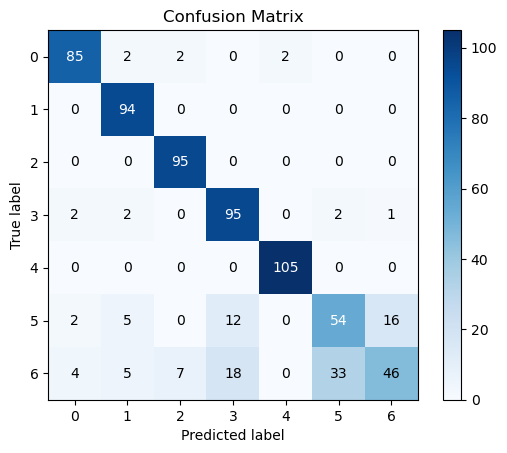

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:55:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8972222222222223
Test Accuracy: 0.9166666666666666
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       184
           1       0.85      1.00      0.92       176

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360



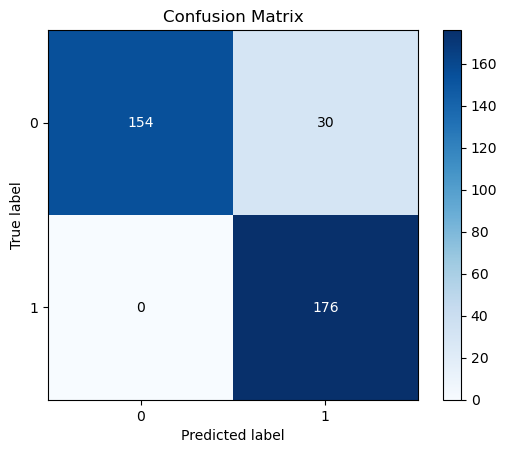

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:55:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8294010889292196
Test Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        98
           1       0.81      0.89      0.84        98
           2       0.88      0.64      0.74       118
           3       0.85      0.82      0.83       114
           4       0.82      0.91      0.86       123

    accuracy                           0.84       551
   macro avg       0.84      0.85      0.84       551
weighted avg       0.85      0.84      0.84       551



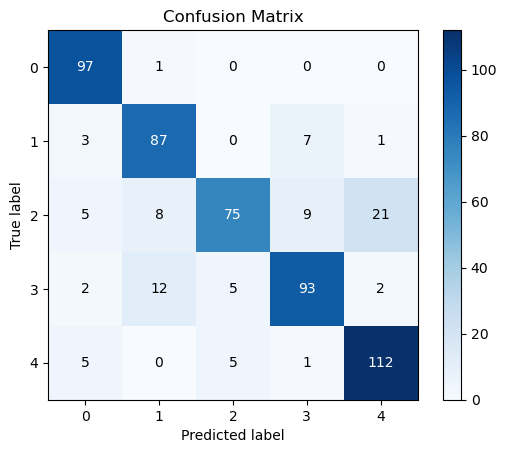

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from imblearn.over_sampling import RandomOverSampler

# Import the dataset
sampled_data # Replace with actual dataset path

# Independent (X) and dependent (y) variables
X = sampled_data [['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features
y_T = sampled_data ['TNM_T_Stage']  # Target T
y_M = sampled_data ['Metastasis_Status']  # Target M
y_Cancer_Stage = sampled_data['Cancer_Stage'].values.ravel()
ros_cs = RandomOverSampler(random_state=0)


# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_cs, y_Cancer_Stage_resampled = ros.fit_resample(X, y_Cancer_Stage)

# Split the data into training, validation, and testing sets for each stage
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_cs,  y_Cancer_Stage_resampled)

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train):
    """Function to be optimized by Bayesian Optimization for each classifier"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation and return the mean score
    cv_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
    return cv_scores.mean()

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Train and optimize for each stage (T, N, M)

def bayesian_optimization(X_train, y_train):
    optimizer = BayesianOptimization(
        f=lambda max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree: 
        xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train),
        pbounds=param_bounds,
        random_state=0,
        verbose=2
    )
    optimizer.maximize(init_points=5, n_iter=10)
    return optimizer.max['params']

best_params_T = bayesian_optimization(X_train_T, y_train_T)
best_params_M = bayesian_optimization(X_train_M, y_train_M)
best_params_CS = bayesian_optimization(X_train_CS, y_train_CS)


# Function to train the model with the best parameters and evaluate
def train_evaluate(X_train, y_train, X_val, y_val, X_test, y_test, best_params):
    model = XGBClassifier(
        max_depth=int(best_params['max_depth']),
        learning_rate=best_params['learning_rate'],
        n_estimators=int(best_params['n_estimators']),
        min_child_weight=best_params['min_child_weight'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=0
    )
    model.fit(X_train, y_train)
    
    # Validation set performance
    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    
    # Test set performance
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {accuracy_test}")
    
    # Classification report and confusion matrix
    print(classification_report(y_test, y_pred_test))
    cm = confusion_matrix(y_test, y_pred_test)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False)
    plt.show()
    
    return model, y_pred_test
    

# 2. Train and evaluate models for T, M, and CS stages
model_T, y_pred_test_ts = train_evaluate(X_train_T, y_train_T, X_val_T, y_val_T, X_test_T, y_test_T, best_params_T)
model_M, y_pred_test_ms = train_evaluate(X_train_M, y_train_M, X_val_M, y_val_M, X_test_M, y_test_M, best_params_M)
model_CS, y_pred_test_cs = train_evaluate(X_train_CS, y_train_CS, X_val_CS, y_val_CS, X_test_CS, y_test_CS, best_params_CS)


|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 1         | 0.7997    | 0.7744    | 0.2174    | 7.219     | 5.904     | 155.9     | 0.8229    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 2         | 0.8273    | 0.7188    | 0.2686    | 9.746     | 4.451     | 247.9     | 0.7644    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 3         | 0.6197    | 0.784     | 0.2784    | 3.497     | 1.784     | 55.05     | 0.9163    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 4         | 0.8012    | 0.8891    | 0.2623    | 9.85      | 8.192     | 165.4     | 0.8903    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 5         | 0.6851    | 0.5591    | 0.1956    | 4.003     | 9.502     | 180.5     | 0.7073    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 6         | 0.8273    | 0.7466    | 0.1112    | 7.078     | 2.206     | 266.4     | 0.711     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:41:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 7         | 0.7779    | 0.6546    | 0.0863    | 9.357     | 4.177     | 246.6     | 0.8113    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 8         | 0.8331    | 0.8647    | 0.3       | 10.0      | 5.07      | 250.9     | 0.6596    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 9         | 0.7881    | 0.5286    | 0.3       | 10.0      | 9.268     | 249.0     | 0.779     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 10        | 0.8331    | 0.5       | 0.3       | 10.0      | 1.0       | 250.8     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 11        | 0.8287    | 0.6511    | 0.2218    | 8.119     | 1.725     | 260.3     | 0.8196    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 12        | 0.7242    | 0.528     | 0.2988    | 3.485     | 4.899     | 262.3     | 0.7191    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 13        | 0.7968    | 1.0       | 0.01      | 10.0      | 1.0       | 255.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 14        | 0.7823    | 1.0       | 0.01      | 10.0      | 1.0       | 264.0     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 15        | 0.7939    | 0.5       | 0.3       | 6.318     | 3.097     | 250.9     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 16        | 0.8084    | 0.5484    | 0.14      | 6.578     | 1.305     | 270.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 17        | 0.7446    | 0.5801    | 0.04948   | 9.003     | 5.642     | 268.9     | 0.9499    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 18        | 0.4833    | 1.0       | 0.01      | 3.492     | 1.0       | 267.8     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 19        | 0.7388    | 1.0       | 0.01      | 9.29      | 3.043     | 249.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 20        | 0.8186    | 0.7484    | 0.3       | 10.0      | 5.154     | 249.4     | 0.6458    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 21        | 0.7663    | 0.5       | 0.3       | 8.925     | 6.862     | 251.0     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:42:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 22        | 0.8447    | 0.5       | 0.3       | 10.0      | 1.0       | 252.8     | 0.7938    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:43:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 23        | 0.807     | 0.5       | 0.3       | 10.0      | 3.496     | 253.3     | 0.5       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:43:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 24        | 0.836     | 0.5       | 0.2924    | 8.996     | 1.277     | 267.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:43:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


| 25        | 0.8374    | 0.5       | 0.3       | 7.351     | 1.0       | 253.4     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:43:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [02:43:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test Accuracy for TNM_T_Stage after Bayesian Optimization: 0.8476052249637155
Test Accuracy for Metastasis Status after Bayesian Optimization: 0.9333333333333333
Test Accuracy for Cancer Stage  after Bayesian Optimization: 0.8693284936479129
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        91
           1       0.87      1.00      0.93        94
           2       0.90      1.00      0.95        95
           3       0.79      0.95      0.86       102
           4       0.98      1.00      0.99       105
           5       0.68      0.71      0.69        89
           6       0.76      0.40      0.52       113

    accuracy                           0.85       689
   macro avg       0.84      0.86      0.84       689
weighted avg       0.84      0.85      0.83       689

              precision    recall  f1-score   support

           0       1.00      0.87      0.93       184
           1       0.88      1.00      0.94       17

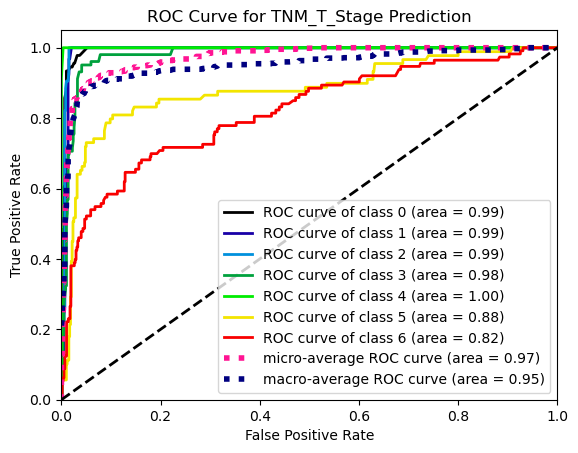

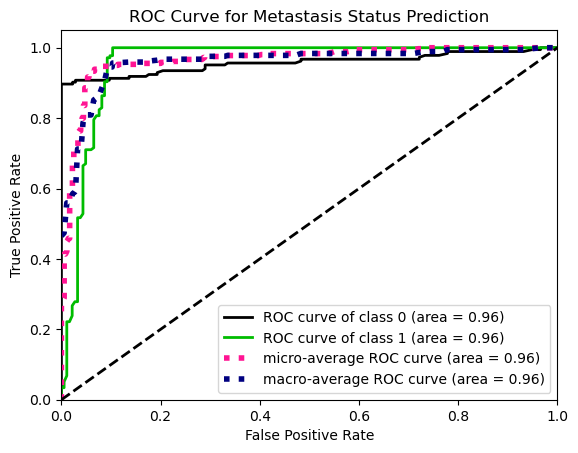

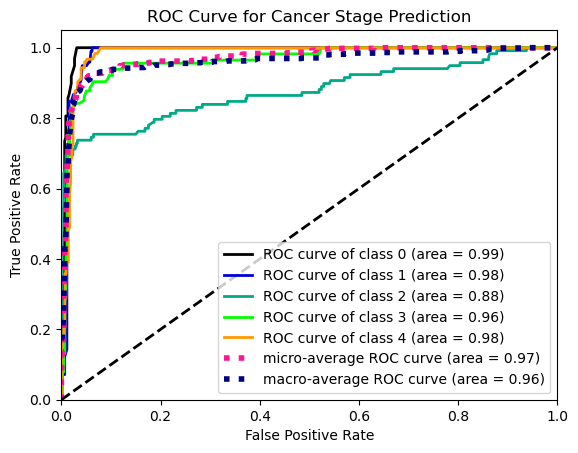

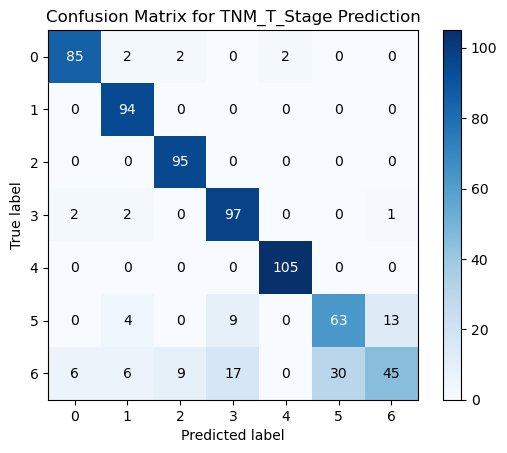

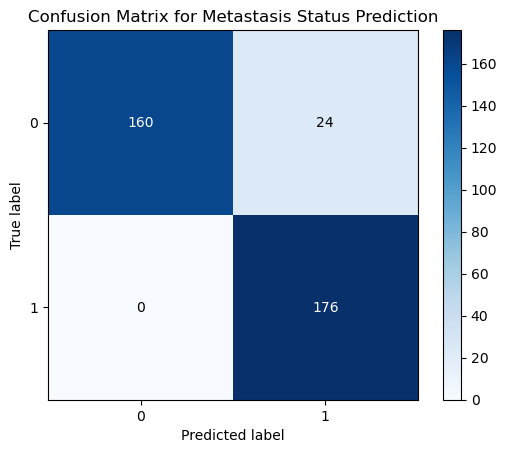

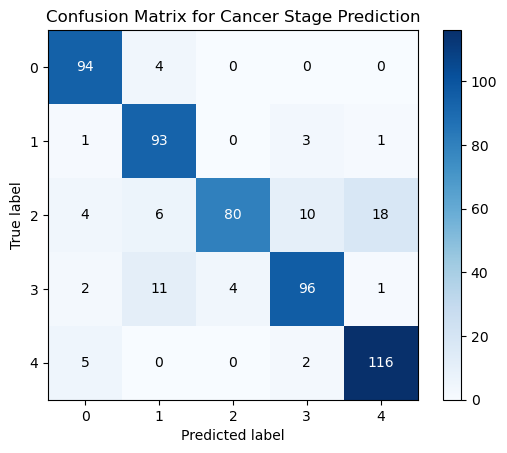

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from xgboost import XGBClassifier
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scikitplot as skplt  # pip install scikit-plot

# Import the dataset
sampled_data # Replace with actual dataset path

# Independent (X) and dependent (y) variables
X = sampled_data [['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features

y_TNM_T_Stage = sampled_data ['TNM_T_Stage']  # Target T
y_metastasis = sampled_data ['Metastasis_Status']  # Target M
y_Cancer_Stage = sampled_data['Cancer_Stage'].values.ravel()


# Oversampling to handle class imbalance
ros_ts = RandomOverSampler(random_state=0)
X_resampled_ts, y_TNM_T_Stage_resampled = ros_ts.fit_resample(X, y_TNM_T_Stage)

ros_ms = RandomOverSampler(random_state=0)
X_resampled_ms, y_metastasis_resampled = ros_ms.fit_resample(X, y_metastasis)

ros_cs = RandomOverSampler(random_state=0)
X_resampled_cs, y_cancer_stage_resampled = ros_cs.fit_resample(X, y_Cancer_Stage)

# Data Splitting
X_trainval_ts, X_test_ts, y_trainval_ts, y_test_ts = train_test_split(X_resampled_ts, y_TNM_T_Stage_resampled, test_size=0.2, random_state=0)
X_train_ts, X_val_ts, y_train_ts, y_val_ts = train_test_split(X_trainval_ts, y_trainval_ts, test_size=0.25, random_state=0)

X_trainval_ms, X_test_ms, y_trainval_ms, y_test_ms = train_test_split(X_resampled_ms, y_metastasis_resampled, test_size=0.2, random_state=0)
X_train_ms, X_val_ms, y_train_ms, y_val_ms = train_test_split(X_trainval_ms, y_trainval_ms, test_size=0.25, random_state=0)

X_trainval_cs, X_test_cs, y_trainval_cs, y_test_cs = train_test_split(X_resampled_cs, y_cancer_stage_resampled, test_size=0.2, random_state=0)
X_train_cs, X_val_cs, y_train_cs, y_val_cs = train_test_split(X_trainval_cs, y_trainval_cs, test_size=0.25, random_state=0)

# Function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree):
    model = XGBClassifier(
        max_depth=int(max_depth),
        learning_rate=learning_rate,
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=0,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    model.fit(X_train_ts, y_train_ts)
    y_pred_val = model.predict(X_val_ts)
    accuracy_val = accuracy_score(y_val_ts, y_pred_val)
    return accuracy_val

# Bayesian Optimization
xgb_bo = BayesianOptimization(
    f=xgb_cv, 
    pbounds={
        'max_depth': (3, 10),
        'learning_rate': (0.01, 0.3),
        'n_estimators': (50, 300),
        'min_child_weight': (1, 10),
        'subsample': (0.5, 1.0),
        'colsample_bytree': (0.5, 1.0)
    },
    random_state=0,
    verbose=2
)
xgb_bo.maximize(init_points=5, n_iter=20)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_ts = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_ms = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Extract best parameters
best_params = xgb_bo.max['params']
best_xgb_classifier_cs = XGBClassifier(
    max_depth=int(best_params['max_depth']),
    learning_rate=best_params['learning_rate'],
    n_estimators=int(best_params['n_estimators']),
    min_child_weight=best_params['min_child_weight'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    random_state=0,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model on the entire training set
best_xgb_classifier_ts.fit(X_trainval_ts, y_trainval_ts)
best_xgb_classifier_ms.fit(X_trainval_ms, y_trainval_ms)
best_xgb_classifier_cs.fit(X_trainval_cs, y_trainval_cs)

# Predict and evaluate
y_pred_test_ts = best_xgb_classifier_ts.predict(X_test_ts)
accuracy_test_ts = accuracy_score(y_test_ts, y_pred_test_ts)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_ts)

y_pred_test_ms = best_xgb_classifier_ms.predict(X_test_ms)
accuracy_test_ms = accuracy_score(y_test_ms, y_pred_test_ms)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_ms)

# Similarly for cancer stage and metastasis classifiers, you can follow the same approach
y_pred_test_cs = best_xgb_classifier_cs.predict(X_test_cs)
accuracy_test_cs = accuracy_score(y_test_cs, y_pred_test_cs)
print("Test Accuracy for Cancer Stage  after Bayesian Optimization:", accuracy_test_cs)

# Classification Report
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ms, y_pred_test_ms))
print(classification_report(y_test_cs, y_pred_test_cs))

# Calculate AUC scores
y_pred_proba_ts = best_xgb_classifier_ts.predict_proba(X_test_ts)
auc_ts = roc_auc_score(y_test_ts, y_pred_proba_ts, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_ts)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_ms, y_pred_test_ms)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

# Calculate AUC score for Cancer Stages prediction
y_pred_proba_cs = best_xgb_classifier_cs.predict_proba(X_test_cs)
auc_cs = roc_auc_score(y_test_cs, y_pred_proba_cs, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_cs)

# Plot ROC Curves for Tumor size, lymph node Status, Metastasis Status
skplt.metrics.plot_roc(y_test_ts, y_pred_proba_ts, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

y_pred_proba_ms = best_xgb_classifier_ms.predict_proba(X_test_ms)
skplt.metrics.plot_roc(y_test_ms, y_pred_proba_ms, title='ROC Curve for Metastasis Status Prediction')
plt.show()

y_pred_proba_cs = best_xgb_classifier_cs.predict_proba(X_test_cs)
skplt.metrics.plot_roc(y_test_cs, y_pred_proba_cs, title='ROC Curve for Cancer Stage Prediction')
plt.show()

# Plot Confusion Matrices
skplt.metrics.plot_confusion_matrix(y_test_ts, y_pred_test_ts, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_ms, y_pred_test_ms, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_cs, y_pred_test_cs, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()

# 4. Results Presentation
results_ts = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_ts),
    'Training Data': pd.Series(y_trainval_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ts[:len(y_test_ts)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ts).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ts).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ts).reset_index(drop=True) - pd.Series(y_pred_test_ts).reset_index(drop=True)
})

results_ms = pd.DataFrame({
    'Type': ['Metastasis Status'] * len(y_test_ms),
    'Training Data': pd.Series(y_trainval_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_ms[:len(y_test_ms)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_ms).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_ms).reset_index(drop=True),
    'Test Error': pd.Series(y_test_ms).reset_index(drop=True) - pd.Series(y_pred_test_ms).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_cs),
    'Training Data': pd.Series(y_trainval_cs[:len(y_test_cs)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_cs[:len(y_test_cs)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_cs).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_cs).reset_index(drop=True),
    'Test Error': pd.Series(y_test_cs).reset_index(drop=True) - pd.Series(y_pred_test_cs).reset_index(drop=True)
})

combined_results = pd.concat([results_ts, results_ms, results_cs], ignore_index=True)
combined_results.head()

# Save the data to a new CSV file (optional)
combined_results.to_csv('XGB4_combined_TNM_results with existing node status.csv', index=False)


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.775     | 31.95     | 0.7437    | 2.808     | 6.359     | 269.5     |
| 2         | 0.7477    | 35.84     | 0.4938    | 3.675     | 9.709     | 253.4     |
| 3         | 0.7604    | 41.67     | 0.576     | 2.704     | 9.405     | 128.4     |
| 4         | 0.7495    | 13.49     | 0.1182    | 3.498     | 8.225     | 448.0     |
| 5         | 0.7568    | 49.14     | 0.8192    | 2.384     | 8.244     | 147.3     |
| 6         | 0.8203    | 26.3      | 0.2329    | 1.599     | 3.971     | 233.8     |
| 7         | 0.7985    | 48.9      | 0.9913    | 2.908     | 3.225     | 226.1     |
| 8         | 0.8221    | 49.15     | 0.7733    | 1.047     | 3.807     | 127.5     |
| 9         | 0.8221    | 49.16     | 0.7847    | 1.051     | 3.811     | 127.5     |
| 10        | 0.8221    | 50.0      | 1.0       | 1.0 

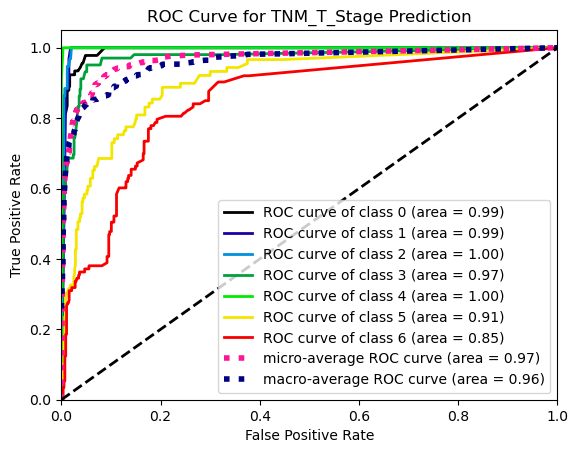

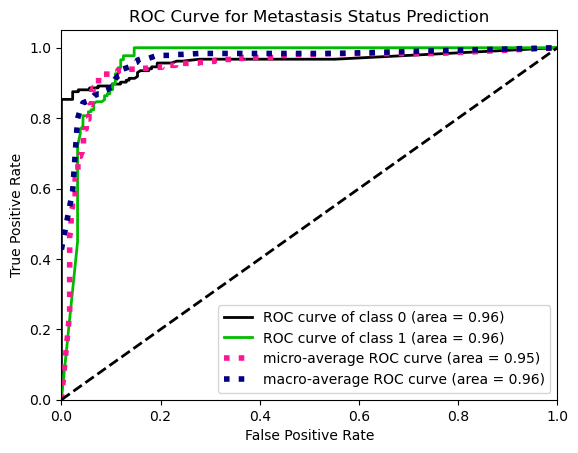

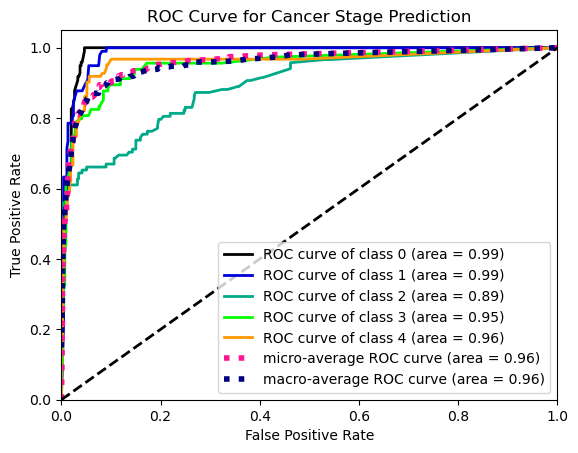

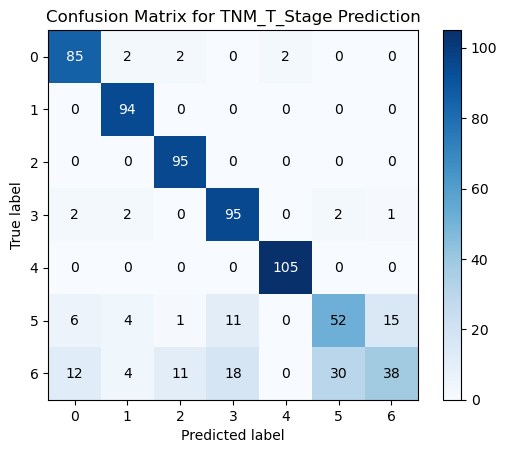

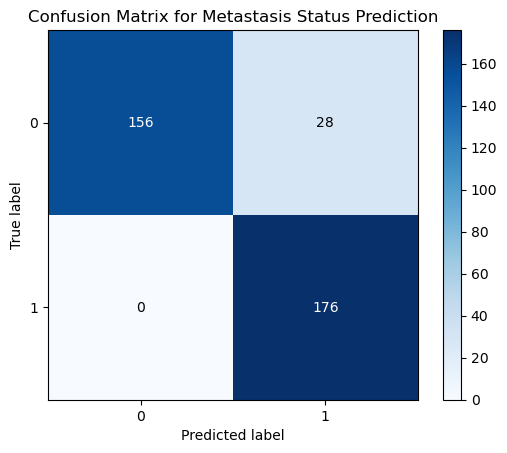

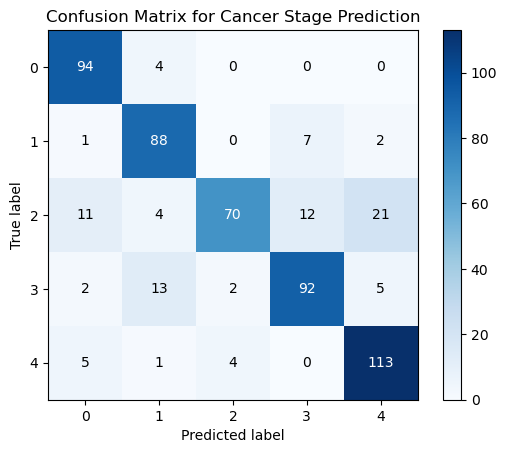

              Type  Training Data  Validation Data  Actual Test Data  \
0      TNM_T_Stage              0                0                 4   
1      TNM_T_Stage              4                6                 2   
2      TNM_T_Stage              2                3                 5   
3      TNM_T_Stage              1                2                 2   
4      TNM_T_Stage              3                1                 3   
...            ...            ...              ...               ...   
1595  Cancer Stage              1                2                 1   
1596  Cancer Stage              0                0                 1   
1597  Cancer Stage              2                3                 1   
1598  Cancer Stage              1                1                 1   
1599  Cancer Stage              4                0                 4   

      Predicted Test Data  Test Error  
0                       4           0  
1                       2           0  
2              

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scikitplot as skplt  # For ROC and Confusion Matrix plots

# Load the dataset
sampled_data 

# Independent (X) and dependent (y) variables
X = sampled_data[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features
y_T = sampled_data['TNM_T_Stage']  # Target T
y_M = sampled_data['Metastasis_Status']  # Target M
y_Cancer_Stage = sampled_data['Cancer_Stage']  # Target Cancer Stage

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)

# Split the data into training, validation, and testing sets for each target
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting for all three targets
X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_CS, y_resampled_CS)

# Function to optimize using Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0,
        class_weight='balanced'
    )
    
    # Fit on the training data for target T (can be extended to M, CS)
    rf_classifier.fit(X_train_T, y_train_T)
    y_pred_val = rf_classifier.predict(X_val_T)
    accuracy_val = accuracy_score(y_val_T, y_pred_val)

    rf_classifier.fit(X_train_M, y_train_M)
    y_pred_val = rf_classifier.predict(X_val_M)
    accuracy_val = accuracy_score(y_val_M, y_pred_val)

    rf_classifier.fit(X_train_CS, y_train_CS)
    y_pred_val = rf_classifier.predict(X_val_CS)
    accuracy_val = accuracy_score(y_val_CS, y_pred_val)
    
    return accuracy_val

# Bayesian Optimization
rf_bo = BayesianOptimization(
    f=rf_cv,
    pbounds={
        'n_estimators': (100, 500),
        'max_depth': (10, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 4),
        'max_features': (0.1, 1.0),
    },
    random_state=0,
    verbose=2
)

rf_bo.maximize(init_points=5, n_iter=20)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_T = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_M = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_CS = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Fit the best model on the training data for TNM_T_Stage
best_rf_classifier_T.fit(X_train_T, y_train_T)
best_rf_classifier_M.fit(X_train_M, y_train_M)
best_rf_classifier_CS.fit(X_train_CS, y_train_CS)

# Predict and evaluate on validation data
y_pred_val_T = best_rf_classifier_T.predict(X_val_T)
accuracy_val_T = accuracy_score(y_val_T, y_pred_val_T)
print("Validation Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_val_T)

# Similarly for lymph node and metastasis classifiers, you can follow the same approach
y_pred_val_M = best_rf_classifier_M.predict(X_val_M)
accuracy_val_M = accuracy_score(y_val_M, y_pred_val_M)
print("Validation Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_val_M)

y_pred_val_cs = best_rf_classifier_CS.predict(X_val_CS)
accuracy_val_cs = accuracy_score(y_val_CS, y_pred_val_cs)
print("Validation Accuracy for Cancer Stage  after Bayesian Optimization:", accuracy_test_cs)

# Predict and evaluate on test data
y_pred_test_T = best_rf_classifier_T.predict(X_test_T)
accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_T)

# Similarly for lymph node and metastasis classifiers, you can follow the same approach
y_pred_test_M = best_rf_classifier_M.predict(X_test_M)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_M)

y_pred_test_cs = best_rf_classifier_CS.predict(X_test_CS)
accuracy_test_cs = accuracy_score(y_test_CS, y_pred_test_cs)
print("Test Accuracy for Cancer Stage  after Bayesian Optimization:", accuracy_test_cs)

# Classification Report
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ms, y_pred_test_ms))
print(classification_report(y_test_cs, y_pred_test_cs))

# AUC Score and ROC Plot
y_pred_proba_T = best_rf_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_rf_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)

# Plot ROC Curve
skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_rf_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_cs, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()

# 4. Results Presentation
results_T = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_T),
    'Training Data': pd.Series(y_train_T[:len(y_test_T)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_T[:len(y_test_T)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_T).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_T).reset_index(drop=True),
    'Test Error': pd.Series(y_test_T).reset_index(drop=True) - pd.Series(y_pred_test_T).reset_index(drop=True)
})

results_M = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_M),
    'Training Data': pd.Series(y_train_M[:len(y_test_M)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_M[:len(y_test_M)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_M).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_M).reset_index(drop=True),
    'Test Error': pd.Series(y_test_M).reset_index(drop=True) - pd.Series(y_pred_test_M).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_CS),
    'Training Data': pd.Series(y_train_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_CS).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_cs).reset_index(drop=True),
    'Test Error': pd.Series(y_test_CS).reset_index(drop=True) - pd.Series(y_pred_test_cs).reset_index(drop=True)
})

# Combine all results into one DataFrame
combined_results = pd.concat([results_T, results_M, results_cs], ignore_index=True)

print(combined_results)

# Save the data to a new CSV file (optional)
combined_results.to_csv('RF4_combined_TNM_results with existing node status.csv', index=False)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation Accuracy for Tumor Size: 0.9622641509433962
Validation Accuracy for Metastasis Status: 0.975
Validation Accuracy for Cancer Stage : 0.9382940108892922
Test Accuracy for Tumor Size: 0.8548621190130624
Test Accuracy for Metastasis Status: 0.9111111111111111
Test Accuracy for Cancer Stage : 0.8548094373865699
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        91
           1       0.87      1.00      0.93        94
           2       0.90      1.00      0.95        95
           3       0.79      0.95      0.86       102
           4       0.98      1.00      0.99       105
           5       0.68      0.71      0.69        89
           6       0.76      0.40      0.52       113

    accuracy                           0.85       689
   macr

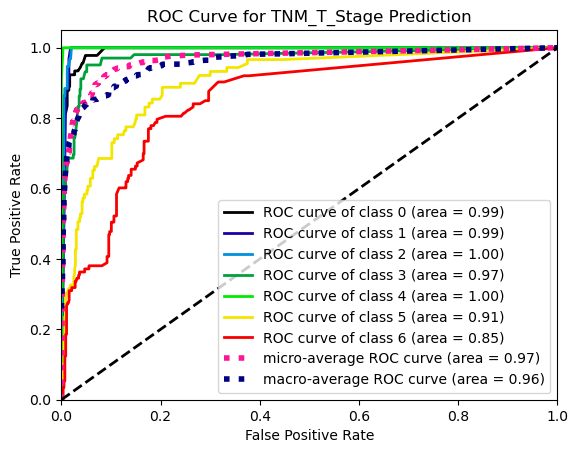

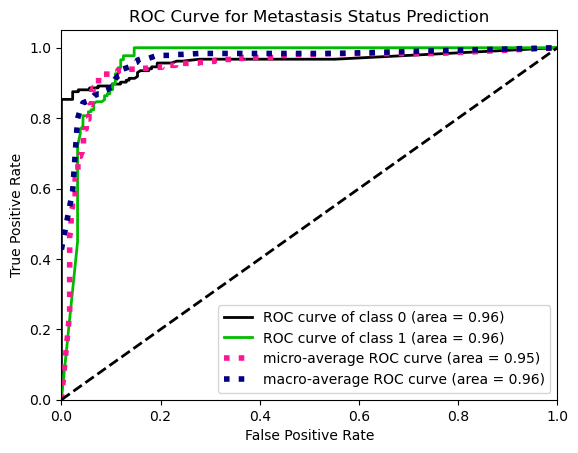

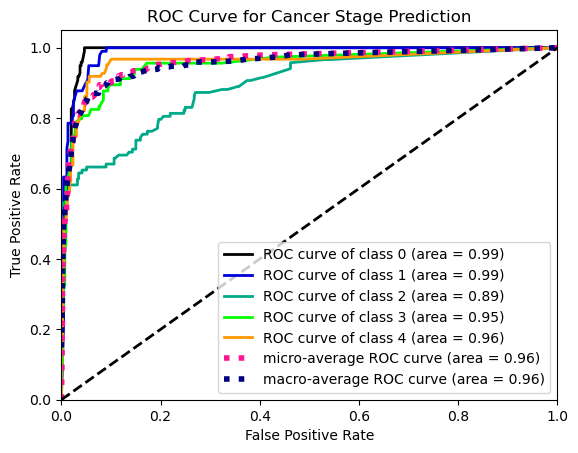

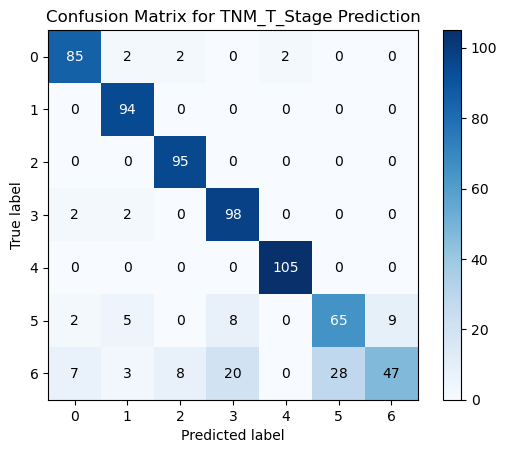

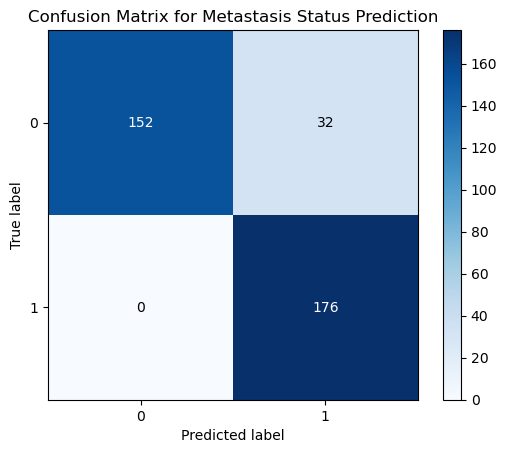

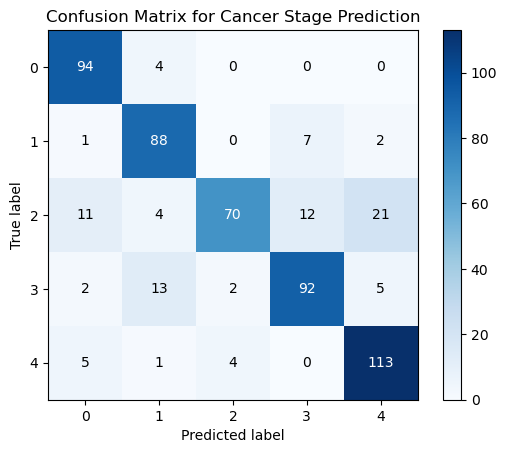

              Type  Training Data  Validation Data  Actual Test Data  \
0      TNM_T_Stage              0                0                 4   
1      TNM_T_Stage              4                6                 2   
2      TNM_T_Stage              2                3                 5   
3      TNM_T_Stage              1                2                 2   
4      TNM_T_Stage              3                1                 3   
...            ...            ...              ...               ...   
1595  Cancer Stage              1                2                 1   
1596  Cancer Stage              0                0                 1   
1597  Cancer Stage              2                3                 1   
1598  Cancer Stage              1                1                 1   
1599  Cancer Stage              4                0                 4   

      Predicted Test Data  Test Error  
0                       4           0  
1                       2           0  
2              

In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt

# Load the dataset
sampled_data 

# Independent (X) and dependent (y) variables
X = sampled_data[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features
y_T = sampled_data['TNM_T_Stage']  # Target T
y_M = sampled_data['Metastasis_Status']  # Target M
y_Cancer_Stage = sampled_data['Cancer_Stage']  # Target Cancer Stage

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)

# 2. Data Splitting
X_trainval_T, X_test_T, y_trainval_T, y_test_T = train_test_split(X_resampled_T, y_resampled_T, test_size=0.2, random_state=0)
X_train_T, X_val_T, y_train_T, y_val_T = train_test_split(X_trainval_T, y_trainval_T, test_size=0.25, random_state=0)

X_trainval_M, X_test_M, y_trainval_M, y_test_M = train_test_split(X_resampled_M, y_resampled_M, test_size=0.2, random_state=0)
X_train_M, X_val_M, y_train_M, y_val_M = train_test_split(X_trainval_M, y_trainval_M, test_size=0.25, random_state=0)

X_trainval_CS, X_test_CS, y_trainval_CS, y_test_CS = train_test_split(X_resampled_CS, y_resampled_CS, test_size=0.2, random_state=0)
X_train_CS, X_val_CS, y_train_CS, y_val_CS = train_test_split(X_trainval_CS, y_trainval_CS, test_size=0.25, random_state=0)

# 3. Model Selection and Training
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_classifier_ts = DecisionTreeClassifier(random_state=0)
dt_classifier_ln = DecisionTreeClassifier(random_state=0)
dt_classifier_ms = DecisionTreeClassifier(random_state=0)

random_search_T = RandomizedSearchCV(estimator=dt_classifier_ts, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_M = RandomizedSearchCV(estimator=dt_classifier_ln, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_CS = RandomizedSearchCV(estimator=dt_classifier_ms, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

random_search_T.fit(X_trainval_T, y_trainval_T)
random_search_M.fit(X_trainval_M, y_trainval_M)
random_search_CS.fit(X_trainval_CS, y_trainval_CS)

best_dt_classifier_T = random_search_T.best_estimator_
best_dt_classifier_M = random_search_M.best_estimator_
best_dt_classifier_CS = random_search_CS.best_estimator_

y_pred_val_T = best_dt_classifier_T.predict(X_val_T)
y_pred_val_M = best_dt_classifier_M.predict(X_val_M)
y_pred_val_CS = best_dt_classifier_CS.predict(X_val_CS)

accuracy_val_T = accuracy_score(y_val_T, y_pred_val_T)
accuracy_val_M = accuracy_score(y_val_M, y_pred_val_M)
accuracy_val_CS = accuracy_score(y_val_CS, y_pred_val_CS)
print("Validation Accuracy for Tumor Size:", accuracy_val_T)
print("Validation Accuracy for Metastasis Status:", accuracy_val_M)
print("Validation Accuracy for Cancer Stage :", accuracy_val_CS)

y_pred_test_T = best_dt_classifier_T.predict(X_test_T)
y_pred_test_M = best_dt_classifier_M.predict(X_test_M)
y_pred_test_CS = best_dt_classifier_CS.predict(X_test_CS)

accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
accuracy_test_CS = accuracy_score(y_test_CS, y_pred_test_CS)

print("Test Accuracy for Tumor Size:", accuracy_test_T)
print("Test Accuracy for Metastasis Status:", accuracy_test_M)
print("Test Accuracy for Cancer Stage :", accuracy_test_CS)

# Classification Report
print(classification_report(y_test_ts, y_pred_test_ts))
print(classification_report(y_test_ms, y_pred_test_ms))
print(classification_report(y_test_cs, y_pred_test_cs))

# AUC Score and ROC Plot
y_pred_proba_T = best_rf_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_rf_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)

# Plot ROC Curve
skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_rf_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_cs, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()

# 4. Results Presentation
results_T = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_T),
    'Training Data': pd.Series(y_train_T[:len(y_test_T)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_T[:len(y_test_T)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_T).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_T).reset_index(drop=True),
    'Test Error': pd.Series(y_test_T).reset_index(drop=True) - pd.Series(y_pred_test_T).reset_index(drop=True)
})

results_M = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_M),
    'Training Data': pd.Series(y_train_M[:len(y_test_M)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_M[:len(y_test_M)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_M).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_M).reset_index(drop=True),
    'Test Error': pd.Series(y_test_M).reset_index(drop=True) - pd.Series(y_pred_test_M).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_CS),
    'Training Data': pd.Series(y_train_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_CS).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_cs).reset_index(drop=True),
    'Test Error': pd.Series(y_test_CS).reset_index(drop=True) - pd.Series(y_pred_test_cs).reset_index(drop=True)
})

# Combine all results into one DataFrame
combined_results = pd.concat([results_T, results_M, results_cs], ignore_index=True)

print(combined_results)

# Save the data to a new CSV file (optional)
combined_results.to_csv('DT4_combined_TNM_results with existing node status.csv', index=False)


# Treatment Prediction

In [13]:
sampled_data.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
1501   85               0               0                                1   
2586   31               1               0                                0   
2653   63               1               0                                1   
1055   64               0               1                                1   
705    87               0               1                                1   

      Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
1501                  0             97                  0            1   
2586                  0             97                  1            0   
2653                  1             12                  1            0   
1055                  1             21                  0            0   
705                   1             26                  1            0   

      Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
1501            1              1                 2                        0   
2586            0              0                 0                        0   
2653            1              1                 2                        1   
1055            1              1                 0                        0   
705             0              1                 1                        0   

      Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  \
1501                 1                  0             3          1   
2586                 0                  0             0          4   
2653                 1                  1             4          2   
1055                 1                  0             2          7   
705                  1                  1             4          3   

      TNM_T_Stage  
1501            6  
2586            0  
2653            3  
1055            5  
705             5

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:52:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.8311    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:53:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:53:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:53:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8379    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.7222    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8224    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:54:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7536    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:55:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:56:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8398    | 0.8005    | 0.07759   | 7.814     | 2.714     | 449.4     | 0.8316    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:57:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8422    | 0.9274    | 0.1294    | 7.594     | 1.353     | 449.7     | 0.6827    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:59:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:59:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:59:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8287    | 1.0       | 0.3       | 3.0       | 1.0       | 492.1     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:59:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:59:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:00:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.5915    | 0.6214    | 0.01      | 10.0      | 10.0      | 212.7     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:00:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:00:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:01:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.5431    | 1.0       | 0.01      | 3.0       | 1.0       | 375.4     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:01:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:01:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:01:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7793    | 0.686     | 0.2202    | 10.0      | 10.0      | 151.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:02:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.8083    | 1.0       | 0.3       | 10.0      | 10.0      | 473.4     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:04:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:05:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.8243    | 1.0       | 0.3       | 3.0       | 1.0       | 431.2     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:06:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:07:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.6651    | 0.6       | 0.01      | 10.0      | 10.0      | 500.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.5349    | 0.6       | 0.01      | 3.0       | 1.0       | 468.3     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.8627    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8831    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.782     | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:08:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8562    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7996    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8423    | 0.6958    | 0.2604    | 8.053     | 7.401     | 444.9     | 0.6993    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.7551    | 0.8163    | 0.01409   | 9.144     | 5.243     | 416.2     | 0.6235    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.7143    | 0.9948    | 0.01194   | 8.467     | 6.552     | 297.2     | 0.6488    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.7634    | 0.8494    | 0.03289   | 8.07      | 9.863     | 453.4     | 0.885     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.7708    | 0.8769    | 0.03248   | 4.905     | 6.402     | 387.6     | 0.771     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.8237    | 0.8082    | 0.06271   | 8.815     | 6.626     | 332.1     | 0.7609    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.8859    | 0.8879    | 0.2969    | 9.779     | 4.101     | 416.6     | 0.606     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.884     | 0.6916    | 0.3       | 10.0      | 3.984     | 417.1     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:09:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8822    | 1.0       | 0.3       | 9.295     | 4.063     | 417.6     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.8794    | 0.6       | 0.3       | 8.931     | 3.282     | 416.9     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:10:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.8475    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:12:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.853     | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:15:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:15:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:15:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.6866    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:15:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:15:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:15:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8355    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7465    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8566    | 0.804     | 0.2655    | 9.491     | 2.306     | 454.7     | 0.7179    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:16:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8264    | 0.7409    | 0.04848   | 9.917     | 3.402     | 455.6     | 0.7153    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:17:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8627    | 1.0       | 0.3       | 7.467     | 1.0       | 450.8     | 0.7318    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.8349    | 1.0       | 0.3       | 3.02      | 1.0       | 455.5     | 0.7528    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8554    | 0.7245    | 0.2773    | 7.613     | 5.458     | 424.0     | 0.8658    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:18:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7017    | 0.8014    | 0.1248    | 3.588     | 9.497     | 418.5     | 0.8364    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.8681    | 0.6901    | 0.3       | 10.0      | 1.0       | 421.6     | 0.8174    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:19:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.8633    | 0.989     | 0.3       | 10.0      | 1.302     | 428.6     | 0.622     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8391    | 0.6       | 0.3       | 10.0      | 8.23      | 431.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:20:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.7925    | 0.6       | 0.3       | 3.0       | 1.0       | 429.1     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.8279    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:21:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8442    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.7734    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8227    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:22:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7883    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8448    | 0.8017    | 0.08961   | 8.867     | 3.75      | 448.6     | 0.8328    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:23:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8338    | 0.8264    | 0.0653    | 8.384     | 3.27      | 447.5     | 0.6311    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:24:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8396    | 0.7058    | 0.1873    | 10.0      | 5.624     | 452.8     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:25:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.7169    | 1.0       | 0.01      | 10.0      | 9.354     | 448.1     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8487    | 0.6429    | 0.1929    | 8.925     | 2.28      | 451.6     | 0.7451    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:26:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.8448    | 1.0       | 0.3       | 5.127     | 3.877     | 451.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:27:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.7656    | 1.0       | 0.01      | 7.296     | 3.46      | 456.8     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.8494    | 0.6       | 0.3       | 5.692     | 1.0       | 449.8     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:28:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8123    | 0.6       | 0.3       | 3.0       | 3.785     | 448.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:29:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:29:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:29:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.8455    | 0.6135    | 0.2898    | 10.0      | 1.305     | 413.5     | 0.6996    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:29:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8505079825834543
Test Accuracy: 0.8519593613933236
              precision    recall  f1-score   support

           0       0.86      0.98      0.91        91
           1       0.90      1.00      0.94        94
           2       0.95      1.00      0.97        95
           3       0.77      0.95      0.85       102
           4       0.98      1.00      0.99       105
           5       0.70      0.62      0.65        89
           6       0.76      0.46      0.57       113

    accuracy                           0.85       689
   macro avg       0.84      0.86      0.84       689
weighted avg       0.85      0.85      0.84       689



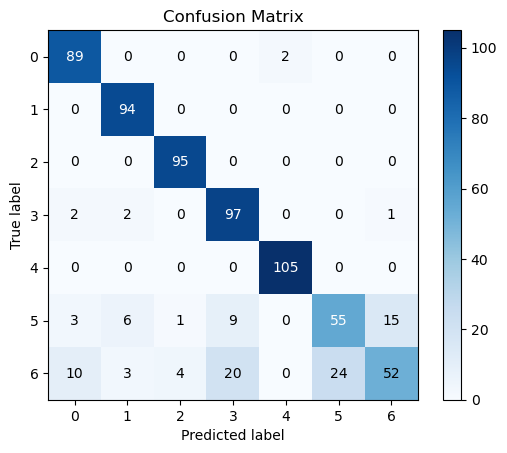

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:29:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8972222222222223
Test Accuracy: 0.8972222222222223
              precision    recall  f1-score   support

           0       0.97      0.82      0.89       184
           1       0.84      0.98      0.90       176

    accuracy                           0.90       360
   macro avg       0.91      0.90      0.90       360
weighted avg       0.91      0.90      0.90       360



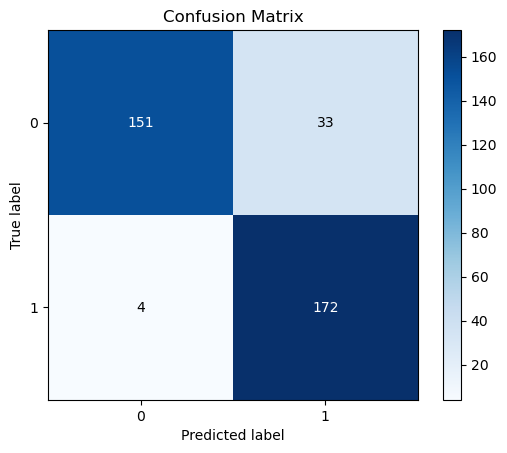

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:29:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8693284936479129
Test Accuracy: 0.8584392014519057
              precision    recall  f1-score   support

           0       0.91      0.99      0.95        98
           1       0.83      0.93      0.88        98
           2       0.90      0.64      0.75       118
           3       0.86      0.83      0.84       114
           4       0.82      0.93      0.87       123

    accuracy                           0.86       551
   macro avg       0.86      0.86      0.86       551
weighted avg       0.86      0.86      0.85       551



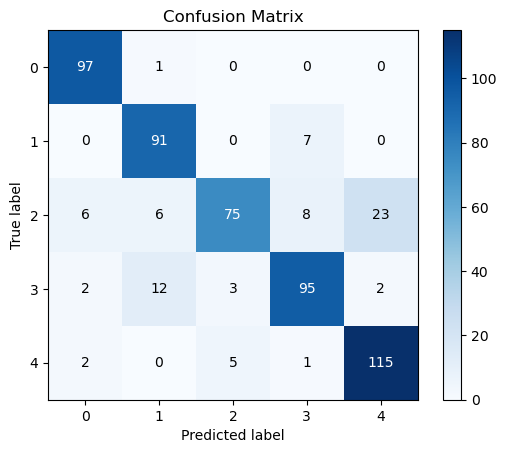

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:30:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.8404669260700389
Test Accuracy: 0.8560311284046692
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        64
           1       0.74      0.84      0.79        55
           2       0.93      1.00      0.96        65
           3       0.77      0.94      0.85        71
           4       0.80      0.85      0.83        62
           5       0.93      0.88      0.90        80
           6       0.95      0.85      0.90        66
           7       0.77      0.47      0.59        51

    accuracy                           0.86       514
   macro avg       0.85      0.84      0.84       514
weighted avg       0.86      0.86      0.85       514



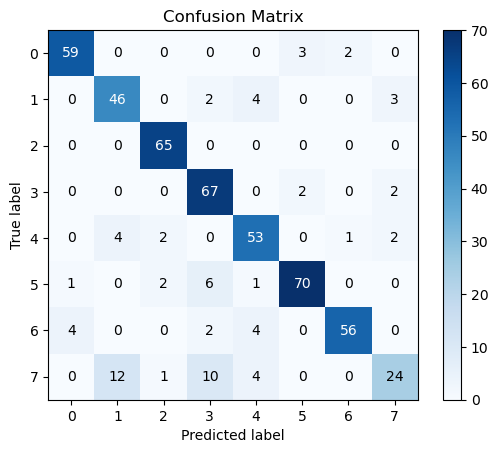

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from imblearn.over_sampling import RandomOverSampler

# Import the dataset
sampled_data # Replace with actual dataset path

# Independent (X) and dependent (y) variables
X = sampled_data [['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status', 'Hormone_Receptor_Status']]  # Features
y_T = sampled_data ['TNM_T_Stage']  # Target T
y_M = sampled_data ['Metastasis_Status']  # Target M
y_Cancer_Stage = sampled_data['Cancer_Stage'].values.ravel()
y_Treatment = sampled_data['Treatment'].values.ravel()
ros_cs = RandomOverSampler(random_state=0)


# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_cs, y_Cancer_Stage_resampled = ros.fit_resample(X, y_Cancer_Stage)
X_resampled_Tr, y_Treatment_resampled = ros.fit_resample(X, y_Treatment)

# Split the data into training, validation, and testing sets for each stage
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_cs,  y_Cancer_Stage_resampled)
X_train_tr, X_val_tr, X_test_tr, y_train_tr, y_val_tr, y_test_tr = train_val_test_split(X_resampled_Tr,  y_Treatment_resampled)

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train):
    """Function to be optimized by Bayesian Optimization for each classifier"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation and return the mean score
    cv_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5)
    return cv_scores.mean()

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Train and optimize for each stage (T,CS,  M, tr)

def bayesian_optimization(X_train, y_train):
    optimizer = BayesianOptimization(
        f=lambda max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree: 
        xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train),
        pbounds=param_bounds,
        random_state=0,
        verbose=2
    )
    optimizer.maximize(init_points=5, n_iter=10)
    return optimizer.max['params']

# Optimizing and training for all targets (TNM_T_Stage, Metastasis_Status, Cancer_Stage, Treatment)
best_params_T = bayesian_optimization(X_train_T, y_train_T)
best_params_M = bayesian_optimization(X_train_M, y_train_M)
best_params_CS = bayesian_optimization(X_train_CS, y_train_CS)
best_params_Tr = bayesian_optimization(X_train_tr, y_train_tr)


# Function to train the model with the best parameters and evaluate
def train_evaluate(X_train, y_train, X_val, y_val, X_test, y_test, best_params):
    model = XGBClassifier(
        max_depth=int(best_params['max_depth']),
        learning_rate=best_params['learning_rate'],
        n_estimators=int(best_params['n_estimators']),
        min_child_weight=best_params['min_child_weight'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=0
    )
    model.fit(X_train, y_train)
    
    # Validation set performance
    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val}")
    
    # Test set performance
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {accuracy_test}")
    
    # Classification report and confusion matrix
    print(classification_report(y_test, y_pred_test))
    cm = confusion_matrix(y_test, y_pred_test)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False)
    plt.show()
    
    return model, y_pred_test
    
# Train and evaluate the models for all stages
model_T, y_pred_test_T = train_evaluate(X_train_T, y_train_T, X_val_T, y_val_T, X_test_T, y_test_T, best_params_T)
model_M, y_pred_test_M = train_evaluate(X_train_M, y_train_M, X_val_M, y_val_M, X_test_M, y_test_M, best_params_M)
model_CS, y_pred_test_CS = train_evaluate(X_train_CS, y_train_CS, X_val_CS, y_val_CS, X_test_CS, y_test_CS, best_params_CS)
model_Tr, y_pred_test_Tr = train_evaluate(X_train_tr, y_train_tr, X_val_tr, y_val_tr, X_test_tr, y_test_tr, best_params_Tr)


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.8074    | 31.95     | 0.7437    | 2.808     | 6.359     | 269.5     |
| 2         | 0.7685    | 35.84     | 0.4938    | 3.675     | 9.709     | 253.4     |
| 3         | 0.7646    | 41.67     | 0.576     | 2.704     | 9.405     | 128.4     |
| 4         | 0.7685    | 13.49     | 0.1182    | 3.498     | 8.225     | 448.0     |
| 5         | 0.7821    | 49.14     | 0.8192    | 2.384     | 8.244     | 147.3     |
| 6         | 0.8658    | 26.3      | 0.2329    | 1.599     | 3.971     | 233.8     |
| 7         | 0.8054    | 48.9      | 0.9913    | 2.908     | 3.225     | 226.1     |
| 8         | 0.8696    | 49.15     | 0.7733    | 1.047     | 3.807     | 127.5     |
| 9         | 0.8696    | 49.16     | 0.778     | 1.054     | 3.814     | 127.5     |
| 10        | 0.7568    | 50.0      | 1.0       | 4.0 

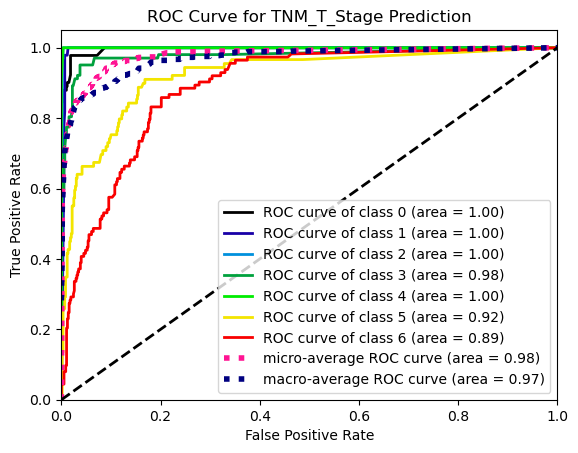

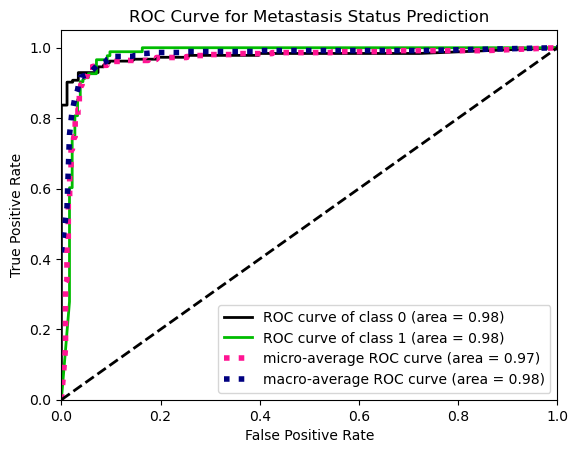

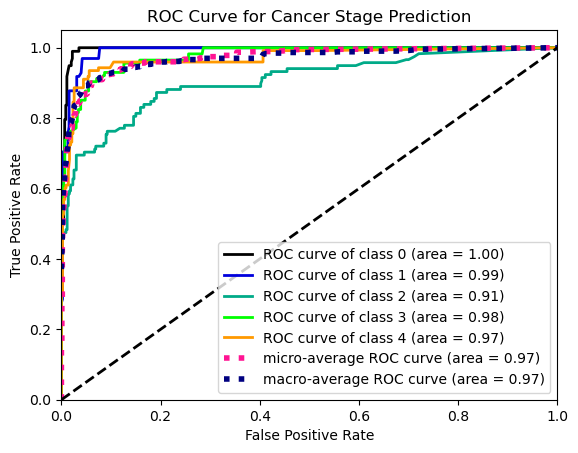

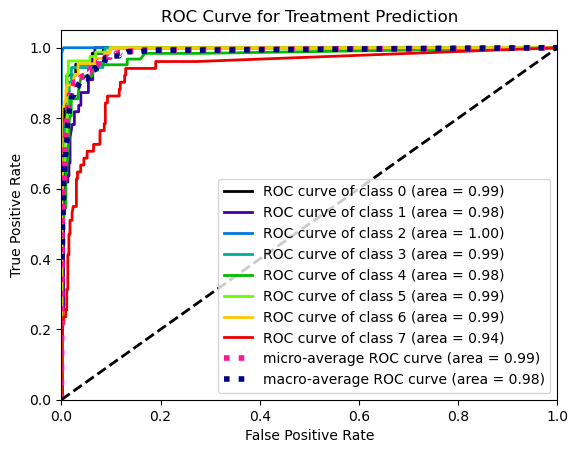

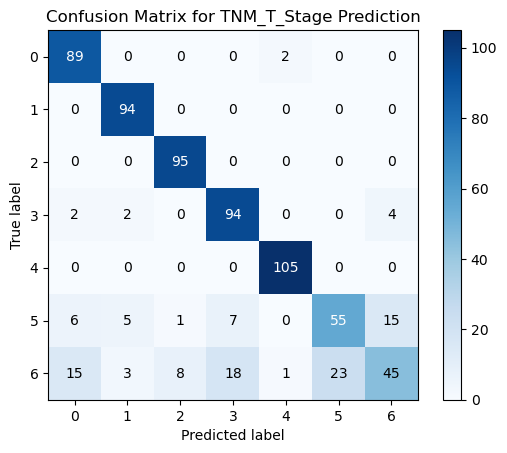

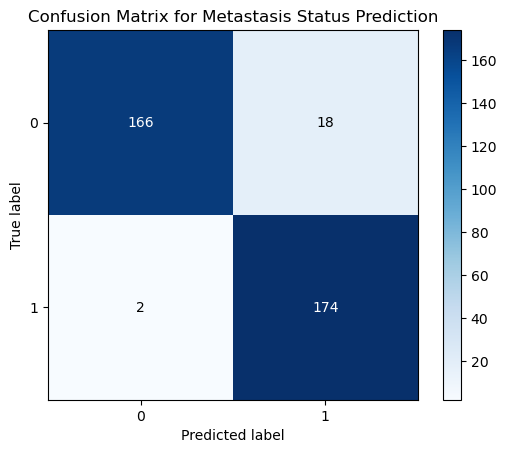

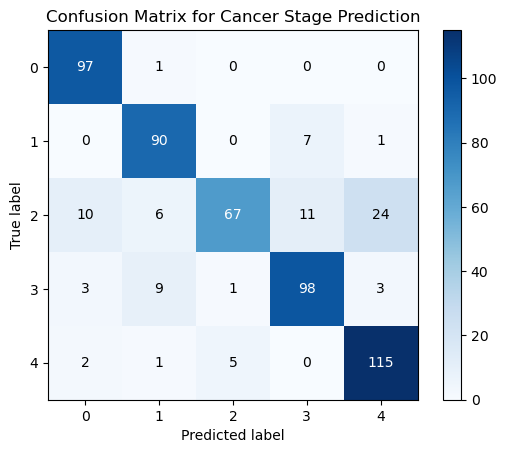

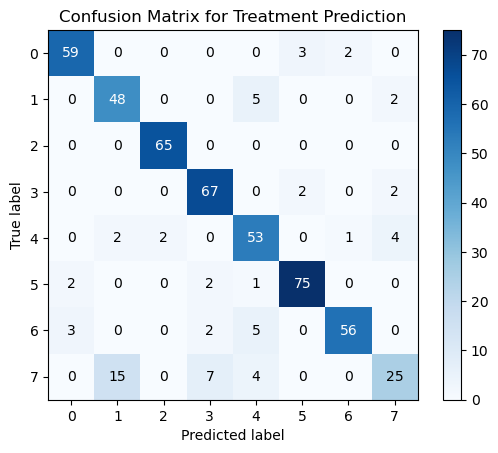

             Type  Training Data  Validation Data  Actual Test Data  \
0     TNM_T_Stage              0                0                 4   
1     TNM_T_Stage              4                6                 2   
2     TNM_T_Stage              2                3                 5   
3     TNM_T_Stage              1                2                 2   
4     TNM_T_Stage              3                1                 3   
...           ...            ...              ...               ...   
2109    Treatment              0                4                 6   
2110    Treatment              3                3                 4   
2111    Treatment              4                5                 2   
2112    Treatment              6                1                 0   
2113    Treatment              4                5                 7   

      Predicted Test Data  Test Error  
0                       4           0  
1                       2           0  
2                       5  

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scikitplot as skplt  # For ROC and Confusion Matrix plots

# Import the dataset
sampled_data # Replace with actual dataset path

# Independent (X) and dependent (y) variables
X = sampled_data [['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status', 'Hormone_Receptor_Status']]  # Features
y_T = sampled_data ['TNM_T_Stage']  # Target T
y_M = sampled_data ['Metastasis_Status']  # Target M
y_Cancer_Stage = sampled_data['Cancer_Stage'].values.ravel()
y_Treatment = sampled_data['Treatment'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)
X_resampled_Tr, y_Treatment_resampled = ros.fit_resample(X, y_Treatment)

# Split the data into training, validation, and testing sets for each target
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_cs,  y_Cancer_Stage_resampled)
X_train_tr, X_val_tr, X_test_tr, y_train_tr, y_val_tr, y_test_tr = train_val_test_split(X_resampled_Tr,  y_Treatment_resampled)

# Function to optimize using Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0,
        class_weight='balanced'
    )
    
    # Fit on the training data for target T (can be extended to M, CS)
    rf_classifier.fit(X_train_T, y_train_T)
    y_pred_val = rf_classifier.predict(X_val_T)
    accuracy_val = accuracy_score(y_val_T, y_pred_val)

    rf_classifier.fit(X_train_M, y_train_M)
    y_pred_val = rf_classifier.predict(X_val_M)
    accuracy_val = accuracy_score(y_val_M, y_pred_val)

    rf_classifier.fit(X_train_CS, y_train_CS)
    y_pred_val = rf_classifier.predict(X_val_CS)
    accuracy_val = accuracy_score(y_val_CS, y_pred_val)

    rf_classifier.fit(X_train_tr, y_train_tr)
    y_pred_val = rf_classifier.predict(X_val_tr)
    accuracy_val = accuracy_score(y_val_tr, y_pred_val)

    
    return accuracy_val

# Bayesian Optimization
rf_bo = BayesianOptimization(
    f=rf_cv,
    pbounds={
        'n_estimators': (100, 500),
        'max_depth': (10, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 4),
        'max_features': (0.1, 1.0),
    },
    random_state=0,
    verbose=2
)

rf_bo.maximize(init_points=5, n_iter=20)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_T = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_M = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_CS = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_tr = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)
# Fit the best model on the training data for TNM_T_Stage
best_rf_classifier_T.fit(X_train_T, y_train_T)
best_rf_classifier_M.fit(X_train_M, y_train_M)
best_rf_classifier_CS.fit(X_train_CS, y_train_CS)
best_rf_classifier_tr.fit(X_train_tr, y_train_tr)

# Predict and evaluate on test data
y_pred_test_T = best_rf_classifier_T.predict(X_test_T)
accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_T)

# Similarly for lymph node and metastasis classifiers, you can follow the same approach
y_pred_test_M = best_rf_classifier_M.predict(X_test_M)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_M)

y_pred_test_cs = best_rf_classifier_CS.predict(X_test_CS)
accuracy_test_cs = accuracy_score(y_test_CS, y_pred_test_cs)
print("Test Accuracy for Cancer Stage  after Bayesian Optimization:", accuracy_test_cs)

y_pred_test_tr = best_rf_classifier_tr.predict(X_test_tr)
accuracy_test_tr = accuracy_score(y_test_tr, y_pred_test_tr)
print("Test Accuracy for Treatmen  after Bayesian Optimization:", accuracy_test_tr)

# AUC Score and ROC Plot
y_pred_proba_T = best_rf_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_rf_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)

y_pred_proba_tr = best_rf_classifier_tr.predict_proba(X_test_tr)
auc_tr = roc_auc_score(y_test_tr, y_pred_proba_tr, multi_class='ovr')
print("AUC Score for Treatment Prediction:", auc_tr)

# Plot ROC Curve
skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_rf_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_tr, y_pred_proba_tr, title='ROC Curve for Treatment Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_cs, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_tr, y_pred_test_tr, normalize=False, title='Confusion Matrix for Treatment Prediction')
plt.show()

# 4. Results Presentation
results_T = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_T),
    'Training Data': pd.Series(y_train_T[:len(y_test_T)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_T[:len(y_test_T)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_T).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_T).reset_index(drop=True),
    'Test Error': pd.Series(y_test_T).reset_index(drop=True) - pd.Series(y_pred_test_T).reset_index(drop=True)
})

results_M = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_M),
    'Training Data': pd.Series(y_train_M[:len(y_test_M)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_M[:len(y_test_M)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_M).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_M).reset_index(drop=True),
    'Test Error': pd.Series(y_test_M).reset_index(drop=True) - pd.Series(y_pred_test_M).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_CS),
    'Training Data': pd.Series(y_train_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_CS).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_cs).reset_index(drop=True),
    'Test Error': pd.Series(y_test_CS).reset_index(drop=True) - pd.Series(y_pred_test_cs).reset_index(drop=True)
})

results_tr = pd.DataFrame({
    'Type': ['Treatment'] * len(y_test_tr),
    'Training Data': pd.Series(y_train_tr[:len(y_test_tr)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_tr[:len(y_test_tr)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_tr).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_tr).reset_index(drop=True),
    'Test Error': pd.Series(y_test_tr).reset_index(drop=True) - pd.Series(y_pred_test_tr).reset_index(drop=True)
})
# Combine all results into one DataFrame
combined_results = pd.concat([results_T, results_M, results_cs, results_tr], ignore_index=True)

print(combined_results)


In [4]:
pip install python-docx


   ---------------------------------------- 0.0/244.3 kB ? eta -:--:--
   --- ----------------------------------- 20.5/244.3 kB 640.0 kB/s eta 0:00:01
   ------ -------------------------------- 41.0/244.3 kB 279.3 kB/s eta 0:00:01
   ----------- --------------------------- 71.7/244.3 kB 393.8 kB/s eta 0:00:01
   -------------- ------------------------ 92.2/244.3 kB 435.7 kB/s eta 0:00:01
   ------------------- ------------------ 122.9/244.3 kB 423.5 kB/s eta 0:00:01
   ----------------------- -------------- 153.6/244.3 kB 416.7 kB/s eta 0:00:01
   ----------------------- -------------- 153.6/244.3 kB 416.7 kB/s eta 0:00:01
   ----------------------- -------------- 153.6/244.3 kB 416.7 kB/s eta 0:00:01
   --------------------------- ---------- 174.1/244.3 kB 317.5 kB/s eta 0:00:01
   --------------------------- ---------- 174.1/244.3 kB 317.5 kB/s eta 0:00:01
   ---------------------------- --------- 184.3/244.3 kB 285.4 kB/s eta 0:00:01
   ------------------------------- ------ 204.8/2

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation Accuracy for Tumor Size: 0.9854862119013063
Validation Accuracy for Metastasis Status: 0.9944444444444445
Validation Accuracy for Cancer Stage : 0.9782214156079855
Validation Accuracy for Treatment : 0.9669260700389105
Test Accuracy for Tumor Size: 0.8606676342525399
Test Accuracy for Metastasis Status: 0.9444444444444444
Test Accuracy for Cancer Stage : 0.8729582577132486
Test Accuracy for Treatment : 0.896887159533074
AUC Score for TNM_T_Stage Prediction: 0.9299795272027743
AUC Score for Metastasis Status Prediction: 0.9456521739130435
AUC Score for Cancer_Stage Prediction: 0.9324802390487766
AUC Score for  Treatment Prediction: 0.9507379648907455


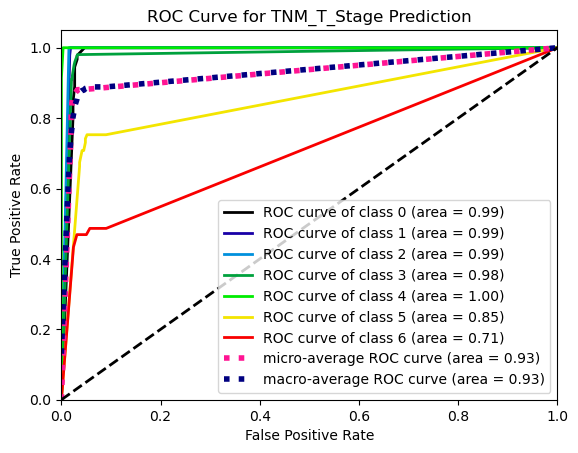

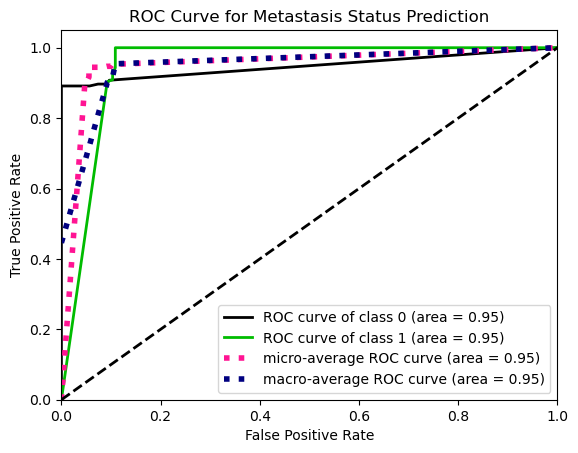

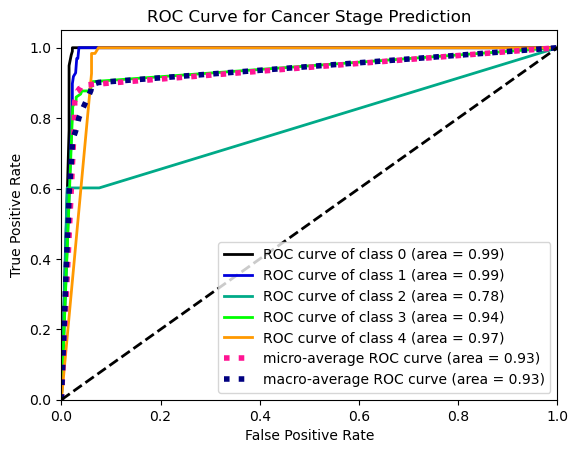

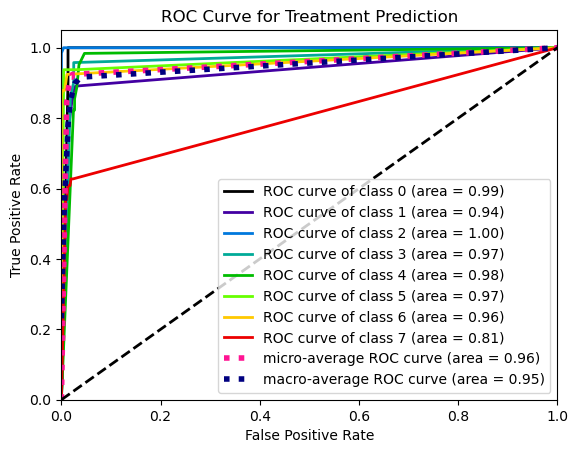

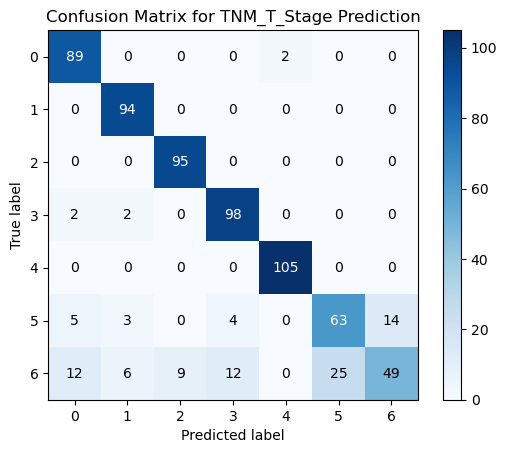

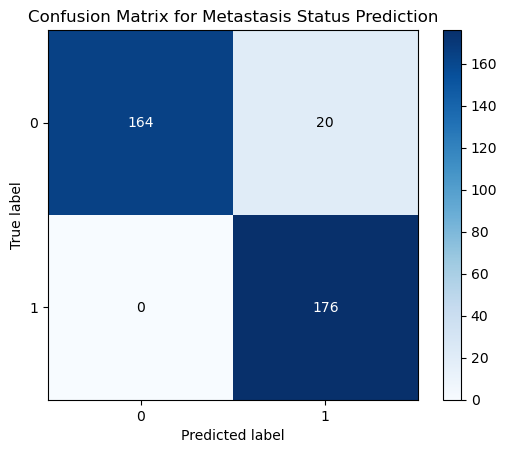

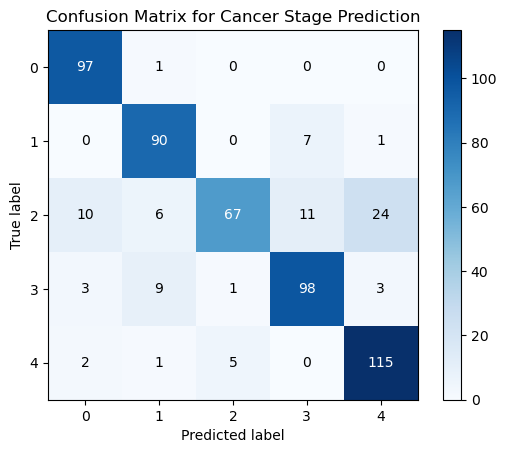

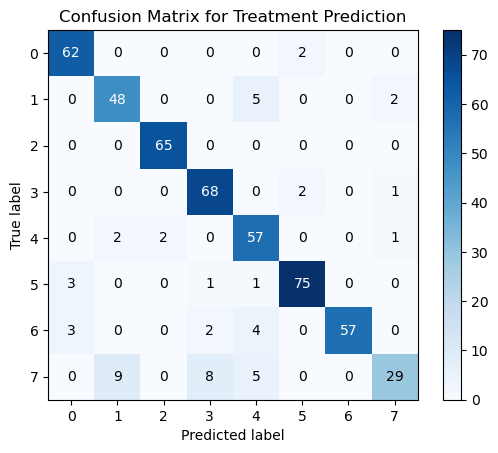

             Type  Training Data  Validation Data  Actual Test Data  \
0     TNM_T_Stage              0                0                 4   
1     TNM_T_Stage              4                6                 2   
2     TNM_T_Stage              2                3                 5   
3     TNM_T_Stage              1                2                 2   
4     TNM_T_Stage              3                1                 3   
...           ...            ...              ...               ...   
2109    Treatment              0                4                 6   
2110    Treatment              3                3                 4   
2111    Treatment              4                5                 2   
2112    Treatment              6                1                 0   
2113    Treatment              4                5                 7   

      Predicted Test Data  Test Error  
0                       4           0  
1                       2           0  
2                       5  

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt

# Import the dataset
sampled_data # Replace with actual dataset path

# Independent (X) and dependent (y) variables
X = sampled_data [['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status', 'Hormone_Receptor_Status']]  # Features
y_T = sampled_data ['TNM_T_Stage']  # Target T
y_M = sampled_data ['Metastasis_Status']  # Target M
y_Cancer_Stage = sampled_data['Cancer_Stage'].values.ravel()
y_Treatment = sampled_data['Treatment'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)
X_resampled_Tr, y_Treatment_resampled = ros.fit_resample(X, y_Treatment)

# 2. Data Splitting
X_trainval_T, X_test_T, y_trainval_T, y_test_T = train_test_split(X_resampled_T, y_resampled_T, test_size=0.2, random_state=0)
X_train_T, X_val_T, y_train_T, y_val_T = train_test_split(X_trainval_T, y_trainval_T, test_size=0.25, random_state=0)

X_trainval_M, X_test_M, y_trainval_M, y_test_M = train_test_split(X_resampled_M, y_resampled_M, test_size=0.2, random_state=0)
X_train_M, X_val_M, y_train_M, y_val_M = train_test_split(X_trainval_M, y_trainval_M, test_size=0.25, random_state=0)

X_trainval_CS, X_test_CS, y_trainval_CS, y_test_CS = train_test_split(X_resampled_CS, y_resampled_CS, test_size=0.2, random_state=0)
X_train_CS, X_val_CS, y_train_CS, y_val_CS = train_test_split(X_trainval_CS, y_trainval_CS, test_size=0.25, random_state=0)

X_trainval_tr, X_test_tr, y_trainval_tr, y_test_tr = train_test_split(X_resampled_Tr, y_Treatment_resampled, test_size=0.2, random_state=0)
X_train_tr, X_val_tr, y_train_tr, y_val_tr = train_test_split(X_trainval_tr, y_trainval_tr, test_size=0.25, random_state=0)

# 3. Model Selection and Training
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_classifier_T = DecisionTreeClassifier(random_state=0)
dt_classifier_M = DecisionTreeClassifier(random_state=0)
dt_classifier_CS = DecisionTreeClassifier(random_state=0)
dt_classifier_tr = DecisionTreeClassifier(random_state=0)

random_search_T = RandomizedSearchCV(estimator=dt_classifier_T, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_M = RandomizedSearchCV(estimator=dt_classifier_M, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_CS = RandomizedSearchCV(estimator=dt_classifier_CS, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_tr = RandomizedSearchCV(estimator=dt_classifier_tr, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

random_search_T.fit(X_trainval_T, y_trainval_T)
random_search_M.fit(X_trainval_M, y_trainval_M)
random_search_CS.fit(X_trainval_CS, y_trainval_CS)
random_search_tr.fit(X_trainval_tr, y_trainval_tr)

best_dt_classifier_T = random_search_T.best_estimator_
best_dt_classifier_M = random_search_M.best_estimator_
best_dt_classifier_CS = random_search_CS.best_estimator_
best_dt_classifier_tr = random_search_tr.best_estimator_

y_pred_val_T = best_dt_classifier_T.predict(X_val_T)
y_pred_val_M = best_dt_classifier_M.predict(X_val_M)
y_pred_val_CS = best_dt_classifier_CS.predict(X_val_CS)
y_pred_val_tr = best_dt_classifier_tr.predict(X_val_tr)

accuracy_val_T = accuracy_score(y_val_T, y_pred_val_T)
accuracy_val_M = accuracy_score(y_val_M, y_pred_val_M)
accuracy_val_CS = accuracy_score(y_val_CS, y_pred_val_CS)
accuracy_val_tr = accuracy_score(y_val_tr, y_pred_val_tr)

print("Validation Accuracy for Tumor Size:", accuracy_val_T)
print("Validation Accuracy for Metastasis Status:", accuracy_val_M)
print("Validation Accuracy for Cancer Stage :", accuracy_val_CS)
print("Validation Accuracy for Treatment :", accuracy_val_tr)

y_pred_test_T = best_dt_classifier_T.predict(X_test_T)
y_pred_test_M = best_dt_classifier_M.predict(X_test_M)
y_pred_test_CS = best_dt_classifier_CS.predict(X_test_CS)
y_pred_test_tr = best_dt_classifier_tr.predict(X_test_tr)

accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
accuracy_test_CS = accuracy_score(y_test_CS, y_pred_test_CS)
accuracy_test_tr = accuracy_score(y_test_tr, y_pred_test_tr)

print("Test Accuracy for Tumor Size:", accuracy_test_T)
print("Test Accuracy for Metastasis Status:", accuracy_test_M)
print("Test Accuracy for Cancer Stage :", accuracy_test_CS)
print("Test Accuracy for Treatment :", accuracy_test_tr)

# AUC Score and ROC Plot
y_pred_proba_T = best_dt_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_dt_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)

y_pred_proba_tr = best_dt_classifier_tr.predict_proba(X_test_tr)
auc_tr = roc_auc_score(y_test_tr, y_pred_proba_tr, multi_class='ovr')
print("AUC Score for  Treatment Prediction:", auc_tr)

# Plot ROC Curve
skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_dt_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_tr, y_pred_proba_tr, title='ROC Curve for Treatment Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_cs, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_tr, y_pred_test_tr, normalize=False, title='Confusion Matrix for Treatment Prediction')
plt.show()

# 4. Results Presentation
results_T = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_T),
    'Training Data': pd.Series(y_train_T[:len(y_test_T)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_T[:len(y_test_T)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_T).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_T).reset_index(drop=True),
    'Test Error': pd.Series(y_test_T).reset_index(drop=True) - pd.Series(y_pred_test_T).reset_index(drop=True)
})

results_M = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_M),
    'Training Data': pd.Series(y_train_M[:len(y_test_M)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_M[:len(y_test_M)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_M).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_M).reset_index(drop=True),
    'Test Error': pd.Series(y_test_M).reset_index(drop=True) - pd.Series(y_pred_test_M).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_CS),
    'Training Data': pd.Series(y_train_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_CS).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_cs).reset_index(drop=True),
    'Test Error': pd.Series(y_test_CS).reset_index(drop=True) - pd.Series(y_pred_test_cs).reset_index(drop=True)
})

results_tr = pd.DataFrame({
    'Type': ['Treatment'] * len(y_test_tr),
    'Training Data': pd.Series(y_train_tr[:len(y_test_tr)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_tr[:len(y_test_tr)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_tr).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_tr).reset_index(drop=True),
    'Test Error': pd.Series(y_test_tr).reset_index(drop=True) - pd.Series(y_pred_test_tr).reset_index(drop=True)
})
# Combine all results into one DataFrame
combined_results = pd.concat([results_T, results_M, results_cs, results_tr], ignore_index=True)

print(combined_results)


# Treatment Prediction using Treatment Table

In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('Reduced_Modified_breast_cancer_data2.csv')
dataset.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   85               0               0                                1   
1   31               1               0                                0   
2   63               1               0                                1   
3   64               0               1                                1   
4   87               0               1                                1   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             97                  0            1   
1                  0             97                  1            0   
2                  1             12                  1            0   
3                  1             21                  0            0   
4                  1             26                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            1              1                 2                        0   
1            0              0                 0                        0   
2            1              1                 2                        1   
3            1              1                 0                        0   
4            0              1                 1                        0   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  TNM_T_Stage  
0                 1                  0             3          1            6  
1                 0                  0             0          4            0  
2                 1                  1             4          2            3  
3                 1                  0             2          7            5  
4                 1                  1             4          3            5

In [2]:
len(dataset)

1000

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.775     | 31.95     | 0.7437    | 2.808     | 6.359     | 269.5     |
| 2         | 0.7477    | 35.84     | 0.4938    | 3.675     | 9.709     | 253.4     |
| 3         | 0.7604    | 41.67     | 0.576     | 2.704     | 9.405     | 128.4     |
| 4         | 0.7495    | 13.49     | 0.1182    | 3.498     | 8.225     | 448.0     |
| 5         | 0.7568    | 49.14     | 0.8192    | 2.384     | 8.244     | 147.3     |
| 6         | 0.8203    | 26.3      | 0.2329    | 1.599     | 3.971     | 233.8     |
| 7         | 0.7985    | 48.9      | 0.9913    | 2.908     | 3.225     | 226.1     |
| 8         | 0.8221    | 49.15     | 0.7733    | 1.047     | 3.807     | 127.5     |
| 9         | 0.8221    | 49.16     | 0.7847    | 1.051     | 3.811     | 127.5     |
| 10        | 0.8221    | 50.0      | 1.0       | 1.0 

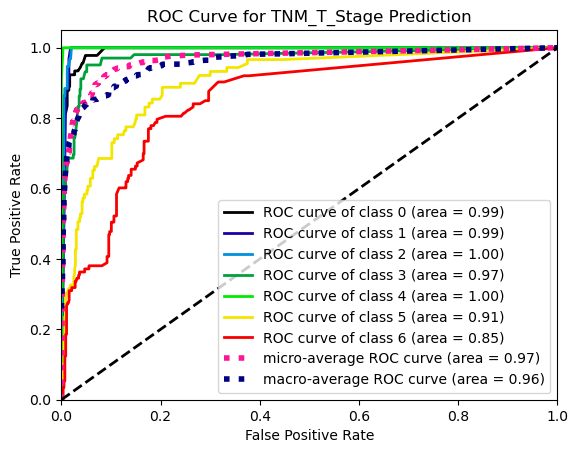

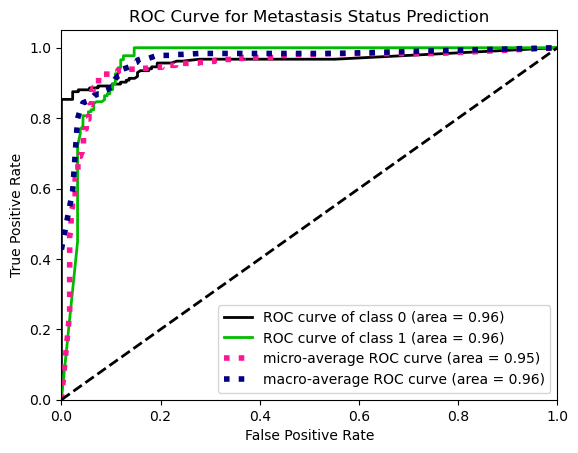

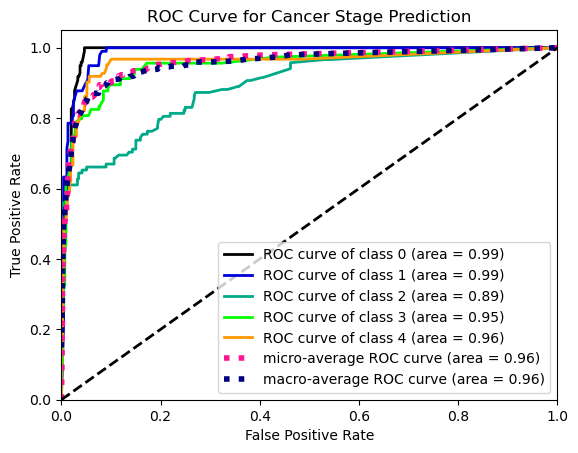

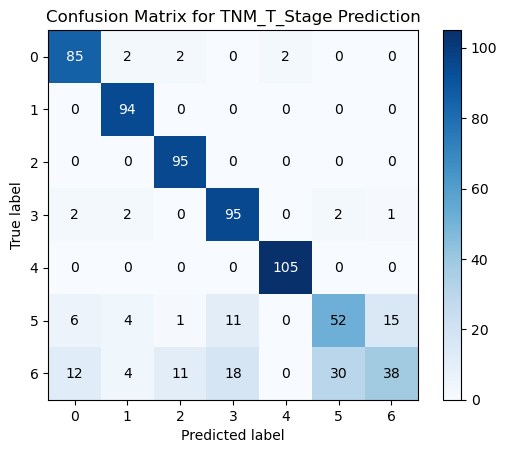

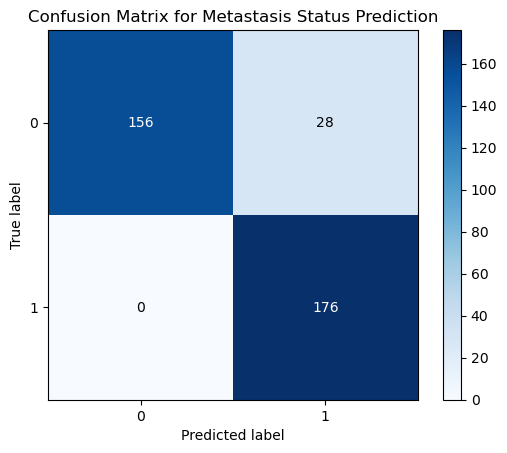

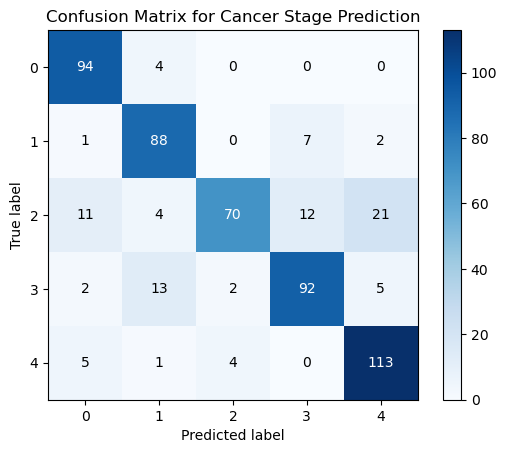

              Type  Training Data  Validation Data  Actual Test Data  \
0      TNM_T_Stage              0                0                 4   
1      TNM_T_Stage              4                6                 2   
2      TNM_T_Stage              2                3                 5   
3      TNM_T_Stage              1                2                 2   
4      TNM_T_Stage              3                1                 3   
...            ...            ...              ...               ...   
1595  Cancer Stage              1                2                 1   
1596  Cancer Stage              0                0                 1   
1597  Cancer Stage              2                3                 1   
1598  Cancer Stage              1                1                 1   
1599  Cancer Stage              4                0                 4   

      Predicted Test Data  Test Error  
0                       4           0  
1                       2           0  
2              

In [22]:
# Random Forest Classifier 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scikitplot as skplt  # For ROC and Confusion Matrix plots
import docx  # For reading Word documents

# Load the dataset
dataset

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features
y_T = dataset['TNM_T_Stage']  # Target T
y_M = dataset['Metastasis_Status']  # Target M
y_Cancer_Stage = dataset['Cancer_Stage']  # Target Cancer Stage

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)

# Function to split the data into train, validation, and test sets
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting for all three targets
X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_CS, y_resampled_CS)

# Function to optimize using Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0,
        class_weight='balanced'
    )
    
    # Fit on the training data for target T (can be extended to M, CS)
    rf_classifier.fit(X_train_T, y_train_T)
    y_pred_val = rf_classifier.predict(X_val_T)
    accuracy_val = accuracy_score(y_val_T, y_pred_val)

    rf_classifier.fit(X_train_M, y_train_M)
    y_pred_val = rf_classifier.predict(X_val_M)
    accuracy_val = accuracy_score(y_val_M, y_pred_val)

    rf_classifier.fit(X_train_CS, y_train_CS)
    y_pred_val = rf_classifier.predict(X_val_CS)
    accuracy_val = accuracy_score(y_val_CS, y_pred_val)
    
    return accuracy_val

# Bayesian Optimization
rf_bo = BayesianOptimization(
    f=rf_cv,
    pbounds={
        'n_estimators': (100, 500),
        'max_depth': (10, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 4),
        'max_features': (0.1, 1.0),
    },
    random_state=0,
    verbose=2
)

rf_bo.maximize(init_points=5, n_iter=20)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_T = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

best_rf_classifier_M = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

best_rf_classifier_CS = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Fit the best model on the training data
best_rf_classifier_T.fit(X_train_T, y_train_T)
best_rf_classifier_M.fit(X_train_M, y_train_M)
best_rf_classifier_CS.fit(X_train_CS, y_train_CS)

# Predict and evaluate on test data
y_pred_test_T = best_rf_classifier_T.predict(X_test_T)
accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_T)

y_pred_test_M = best_rf_classifier_M.predict(X_test_M)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_M)

y_pred_test_cs = best_rf_classifier_CS.predict(X_test_CS)
accuracy_test_cs = accuracy_score(y_test_CS, y_pred_test_cs)
print("Test Accuracy for Cancer Stage after Bayesian Optimization:", accuracy_test_cs)


# AUC Score and ROC Plot
y_pred_proba_T = best_rf_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_rf_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)


# Plot ROC Curve
skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_rf_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_cs, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()


# 4. Results Presentation
results_T = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_T),
    'Training Data': pd.Series(y_train_T[:len(y_test_T)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_T[:len(y_test_T)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_T).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_T).reset_index(drop=True),
    'Test Error': pd.Series(y_test_T).reset_index(drop=True) - pd.Series(y_pred_test_T).reset_index(drop=True)
})

results_M = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_M),
    'Training Data': pd.Series(y_train_M[:len(y_test_M)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_M[:len(y_test_M)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_M).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_M).reset_index(drop=True),
    'Test Error': pd.Series(y_test_M).reset_index(drop=True) - pd.Series(y_pred_test_M).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_CS),
    'Training Data': pd.Series(y_train_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_CS).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_cs).reset_index(drop=True),
    'Test Error': pd.Series(y_test_CS).reset_index(drop=True) - pd.Series(y_pred_test_cs).reset_index(drop=True)
})

# Combine all results into one DataFrame
combined_results = pd.concat([results_T, results_M, results_cs], ignore_index=True)

print(combined_results)

import docx
import pandas as pd

# Function to extract treatment data from a table in a Word document
def get_treatment_from_docx_table(stage, docx_path):
    doc = docx.Document(docx_path)
    treatment = "Unknown Treatment"

    for table in doc.tables:
        # Iterate over the rows in the table
        for row in table.rows:
            # Assuming the first column contains the stage and the third column contains the treatment
            stage_text = row.cells[0].text.strip()
            # Treatment is in the third cell
            treatment_text = row.cells[2].text.strip() if len(row.cells) > 2 else ""

            # Debugging output to see what stages and treatments are being processed
            print(f"Checking Stage: {stage_text} | Treatment: {treatment_text}")
            
            # Check if the stage matches
            if stage_text.lower() == f"stage {stage}".lower():  # Case insensitive comparison
                treatment = treatment_text
                break
        if treatment != "Unknown Treatment":
            break  # Exit once the treatment is found

    return treatment

# Specify the path to your Word document containing the treatment table
docx_path = "numerical_breast_cancer_stages_treatments.docx"

# Get treatments for the predicted cancer stages
predicted_treatments = [get_treatment_from_docx_table(stage, docx_path) for stage in y_pred_test_cs]

# Combine results and treatments into one DataFrame
results_cs = pd.DataFrame({
    'Cancer Stage': y_pred_test_cs,
    'Treatment': predicted_treatments
})

print(results_cs)

# Now you can proceed with plotting ROC, confusion matrix, etc.


In [23]:
results_cs.head()

Cancer Stage                                          Treatment
0             3  Chemotherapy, mastectomy, radiation therapy, t...
1             4  Systemic therapies (chemotherapy, hormone ther...
2             0  Monitoring, surgical removal (excisional biops...
3             1  Lumpectomy with radiation, mastectomy, hormone...
4             4  Systemic therapies (chemotherapy, hormone ther...

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:48:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:48:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:48:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.7972    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:48:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:49:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:49:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8161    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:49:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:49:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:49:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.6873    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:49:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:49:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:49:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8069    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:50:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:50:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:50:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7086    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:50:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:50:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:50:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8103    | 0.7242    | 0.2596    | 8.688     | 6.387     | 435.2     | 0.7625    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:51:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:51:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8083    | 0.921     | 0.1353    | 8.897     | 4.678     | 415.6     | 0.7241    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:52:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:52:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:52:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8277    | 0.6946    | 0.2552    | 10.0      | 1.0       | 461.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:52:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:52:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:53:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.607     | 0.907     | 0.03501   | 3.331     | 10.0      | 476.3     | 0.6798    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:53:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:53:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:53:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 449.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:53:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:53:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:54:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7967    | 0.8732    | 0.2274    | 9.565     | 8.939     | 244.0     | 0.9754    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:54:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:54:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:54:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.5058    | 0.6698    | 0.01      | 3.0       | 1.339     | 223.7     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:54:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:54:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:54:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 372.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.6902    | 0.6       | 0.3       | 3.0       | 10.0      | 356.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 389.2     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.8395    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8775    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:55:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.7495    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8441    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7411    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8729    | 0.7871    | 0.1784    | 8.835     | 3.635     | 432.1     | 0.8221    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8645    | 0.9865    | 0.1471    | 9.919     | 5.511     | 416.0     | 0.7649    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8219    | 0.6       | 0.3       | 3.0       | 1.0       | 422.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.8265    | 0.6       | 0.3       | 10.0      | 6.495     | 424.3     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8896    | 0.6       | 0.3       | 7.538     | 1.0       | 413.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.8952    | 0.9529    | 0.1665    | 10.0      | 1.935     | 440.3     | 0.9758    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.6697    | 0.6979    | 0.01      | 6.09      | 9.65      | 441.1     | 0.6068    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.9017    | 1.0       | 0.3       | 10.0      | 1.0       | 436.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:56:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8924    | 0.6       | 0.3       | 10.0      | 1.0       | 404.6     | 0.6236    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.7792    | 0.6       | 0.3       | 3.0       | 4.619     | 404.5     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.7931    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:57:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8209    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.6709    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8028    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7018    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:58:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:59:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8094    | 0.7724    | 0.0881    | 7.99      | 3.223     | 436.5     | 0.8259    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:59:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:59:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:59:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8094    | 0.9967    | 0.1412    | 9.928     | 5.563     | 416.0     | 0.7627    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [06:59:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:00:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:00:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.7441    | 0.6       | 0.3       | 3.0       | 1.0       | 424.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:00:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:00:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:00:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.8294    | 0.6       | 0.3       | 6.616     | 1.0       | 411.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:00:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:00:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:01:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8324    | 0.6       | 0.3       | 10.0      | 1.0       | 403.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:01:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:01:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:01:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7429    | 0.6       | 0.3       | 3.0       | 1.0       | 397.0     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:01:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:01:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:01:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.7961    | 0.6       | 0.3       | 10.0      | 7.983     | 405.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:02:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:02:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:02:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.7042    | 0.8651    | 0.01557   | 10.0      | 5.551     | 446.2     | 0.6697    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:02:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:02:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:02:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8318    | 0.6       | 0.3       | 10.0      | 1.0       | 408.5     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:03:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:03:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:03:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.7356    | 0.7195    | 0.2514    | 3.0       | 1.0       | 280.4     | 0.9835    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:03:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.83
Test Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        91
           1       0.87      1.00      0.93        94
           2       0.91      1.00      0.95        95
           3       0.76      0.93      0.84       102
           4       0.98      1.00      0.99       105
           5       0.61      0.61      0.61        89
           6       0.73      0.41      0.52       113

    accuracy                           0.83       689
   macro avg       0.83      0.84      0.82       689
weighted avg       0.83      0.83      0.82       689



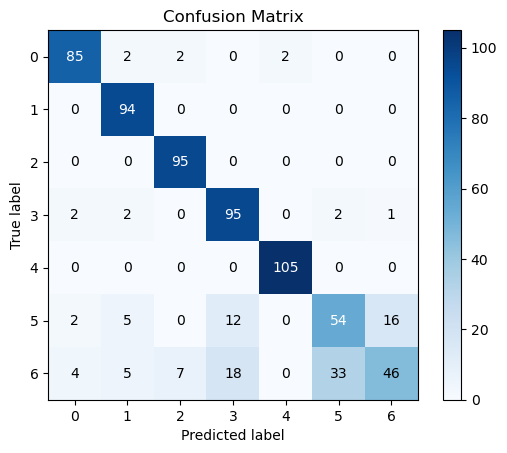

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:03:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.90
Test Accuracy: 0.92
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       184
           1       0.85      1.00      0.92       176

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360



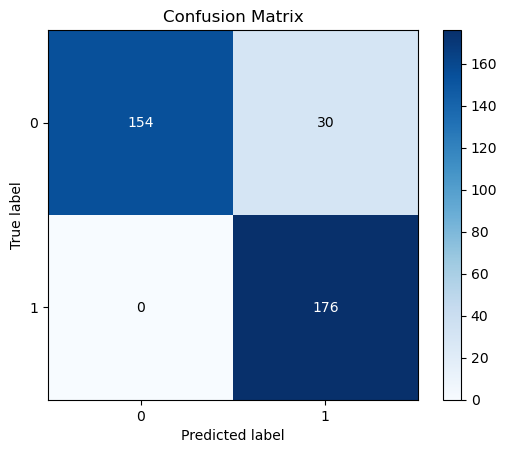

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [07:03:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.83
Test Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        98
           1       0.81      0.89      0.84        98
           2       0.88      0.64      0.74       118
           3       0.85      0.82      0.83       114
           4       0.82      0.91      0.86       123

    accuracy                           0.84       551
   macro avg       0.84      0.85      0.84       551
weighted avg       0.85      0.84      0.84       551



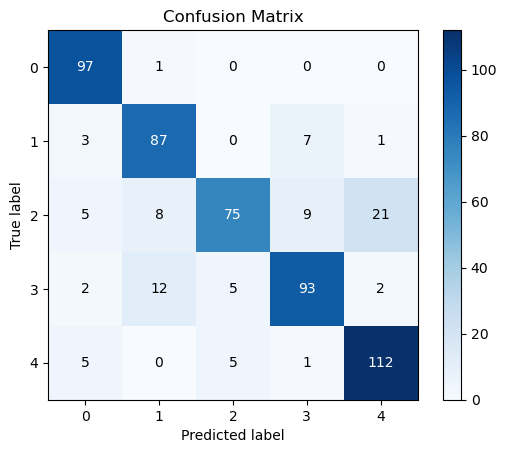

Checking Stage: Breast Cancer Stage | Treatment: Treatments
Checking Stage: Stage 0 | Treatment: Monitoring, surgical removal (excisional biopsy), cryoablation
Checking Stage: Stage 1 | Treatment: Lumpectomy with radiation, mastectomy, hormone therapy (if hormone receptor-positive)
Checking Stage: Stage 2 | Treatment: Lumpectomy or mastectomy, chemotherapy, radiation therapy, hormone or targeted therapy (if HER2-positive)
Checking Stage: Stage 3 | Treatment: Chemotherapy, mastectomy, radiation therapy, targeted therapies (if HER2-positive)
Checking Stage: Breast Cancer Stage | Treatment: Treatments
Checking Stage: Stage 0 | Treatment: Monitoring, surgical removal (excisional biopsy), cryoablation
Checking Stage: Stage 1 | Treatment: Lumpectomy with radiation, mastectomy, hormone therapy (if hormone receptor-positive)
Checking Stage: Stage 2 | Treatment: Lumpectomy or mastectomy, chemotherapy, radiation therapy, hormone or targeted therapy (if HER2-positive)
Checking Stage: Stage 3 | Tr

In [17]:
# XGBoost Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from imblearn.over_sampling import RandomOverSampler
import docx

# Load the dataset (Ensure you replace this with your actual dataset loading method)
# dataset = pd.read_csv('path_to_your_dataset.csv')  # Example loading method

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features
y_T = dataset['TNM_T_Stage']  # Target T
y_M = dataset['Metastasis_Status']  # Target M
y_Cancer_Stage = dataset['Cancer_Stage']  # Target Cancer Stage

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)

# Function to split the data into train, validation, and test sets
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting for all three targets
X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_CS, y_resampled_CS)

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train):
    """Function to be optimized by Bayesian Optimization for each classifier"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=5)  # Adjust cv as necessary
    return cv_results.mean()

# Function for Bayesian Optimization
def bayesian_optimization(X_train, y_train):
    optimizer = BayesianOptimization(
        f=lambda max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree: 
        xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train),
        pbounds=param_bounds,
        random_state=0,
        verbose=2
    )
    optimizer.maximize(init_points=5, n_iter=10)
    return optimizer.max['params']

# Optimizing and training for all targets (TNM_T_Stage, Metastasis_Status, Cancer_Stage)
best_params_T = bayesian_optimization(X_train_T, y_train_T)
best_params_M = bayesian_optimization(X_train_M, y_train_M)
best_params_CS = bayesian_optimization(X_train_CS, y_train_CS)

# Function to train the model with the best parameters and evaluate
def train_evaluate(X_train, y_train, X_val, y_val, X_test, y_test, best_params):
    model = XGBClassifier(
        max_depth=int(best_params['max_depth']),
        learning_rate=best_params['learning_rate'],
        n_estimators=int(best_params['n_estimators']),
        min_child_weight=best_params['min_child_weight'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=0
    )
    model.fit(X_train, y_train)

    # Validation set performance
    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val:.2f}")
    
    # Test set performance
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {accuracy_test:.2f}")
    
    # Classification report and confusion matrix
    print(classification_report(y_test, y_pred_test))
    cm = confusion_matrix(y_test, y_pred_test)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False)
    plt.show()
    
    return model, y_pred_test

# Train and evaluate the models for all stages
model_T, y_pred_test_T = train_evaluate(X_train_T, y_train_T, X_val_T, y_val_T, X_test_T, y_test_T, best_params_T)
model_M, y_pred_test_M = train_evaluate(X_train_M, y_train_M, X_val_M, y_val_M, X_test_M, y_test_M, best_params_M)
model_CS, y_pred_test_CS = train_evaluate(X_train_CS, y_train_CS, X_val_CS, y_val_CS, X_test_CS, y_test_CS, best_params_CS)

# Function to extract treatment data from a table in a Word document
def get_treatment_from_docx_table(stage, docx_path):
    doc = docx.Document(docx_path)
    treatment = "Unknown Treatment"

    for table in doc.tables:
        # Iterate over the rows in the table
        for row in table.rows:
            # Assuming the first column contains the stage and the third column contains the treatment
            stage_text = row.cells[0].text.strip()
            # Treatment is in the third cell
            treatment_text = row.cells[2].text.strip() if len(row.cells) > 2 else ""

            # Debugging output to see what stages and treatments are being processed
            print(f"Checking Stage: {stage_text} | Treatment: {treatment_text}")
            
            # Check if the stage matches
            if stage_text.lower() == f"stage {stage}".lower():  # Case insensitive comparison
                treatment = treatment_text
                break
        if treatment != "Unknown Treatment":
            break  # Exit once the treatment is found

    return treatment

# Specify the path to your Word document containing the treatment table
docx_path = "numerical_breast_cancer_stages_treatments.docx"  # Adjust path as necessary

# Get treatments for the predicted cancer stages
predicted_treatments = [get_treatment_from_docx_table(stage, docx_path) for stage in y_pred_test_CS]

# Combine results and treatments into one DataFrame
results_cs = pd.DataFrame({
    'Cancer Stage': y_pred_test_CS,
    'Treatment': predicted_treatments
})

print(results_cs)


In [19]:
results_cs.head()

Cancer Stage                                          Treatment
0             3  Chemotherapy, mastectomy, radiation therapy, t...
1             4  Systemic therapies (chemotherapy, hormone ther...
2             0  Monitoring, surgical removal (excisional biops...
3             1  Lumpectomy with radiation, mastectomy, hormone...
4             4  Systemic therapies (chemotherapy, hormone ther...

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation Accuracy for Tumor Size: 0.9622641509433962
Validation Accuracy for Metastasis Status: 0.975
Validation Accuracy for Cancer Stage : 0.9382940108892922
Test Accuracy for Tumor Size: 0.8548621190130624
Test Accuracy for Metastasis Status: 0.9111111111111111
Test Accuracy for Cancer Stage : 0.8548094373865699
AUC Score for TNM_T_Stage Prediction: 0.9266371205886316
AUC Score for Metastasis Status Prediction: 0.9130434782608696
AUC Score for Cancer_Stage Prediction: 0.9370259509825487


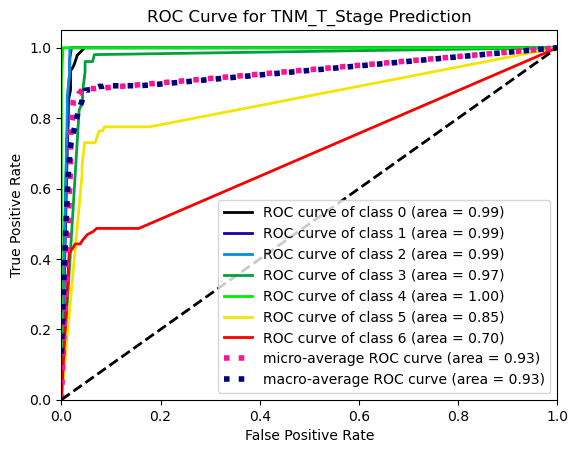

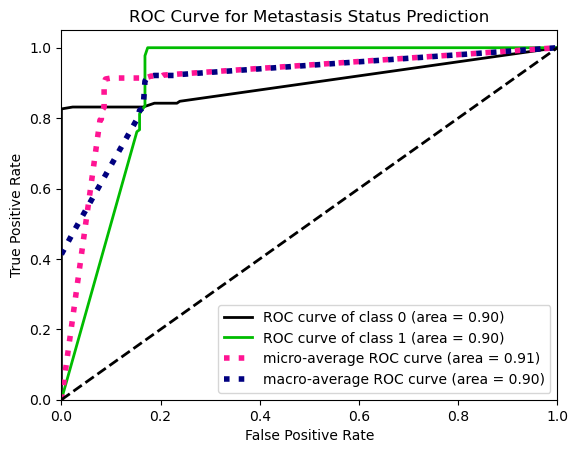

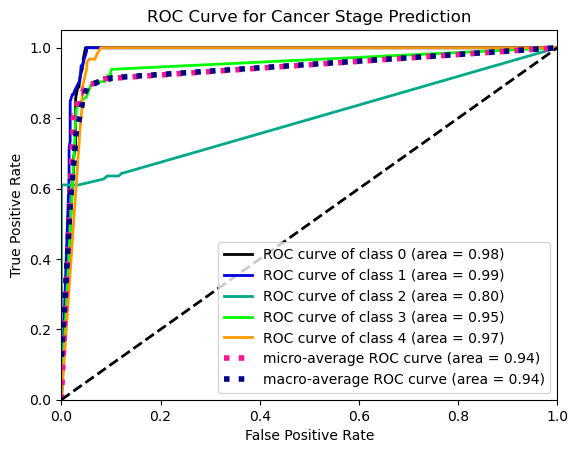

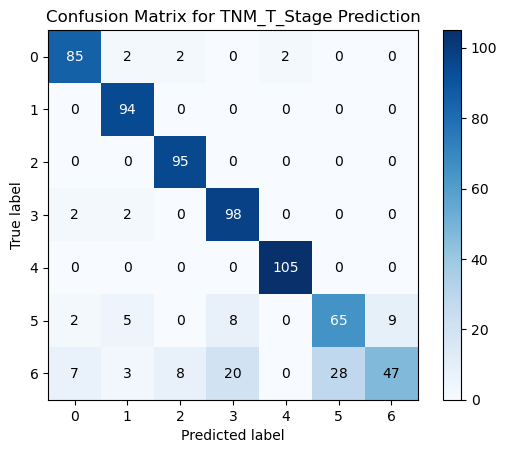

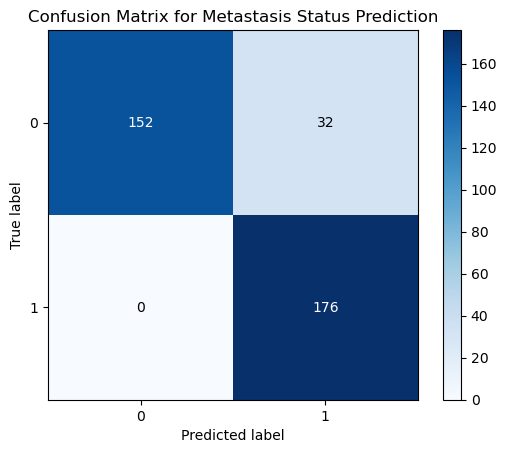

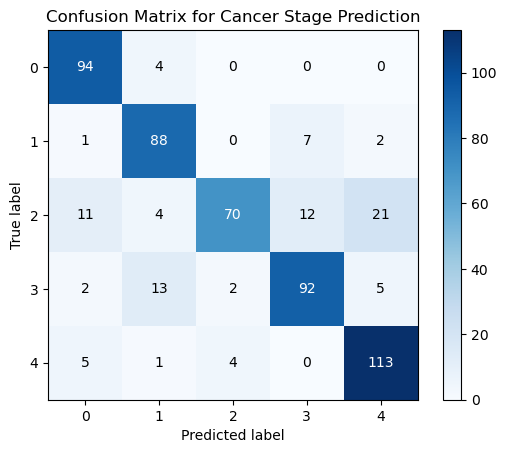

              Type  Training Data  Validation Data  Actual Test Data  \
0      TNM_T_Stage              0                0                 4   
1      TNM_T_Stage              4                6                 2   
2      TNM_T_Stage              2                3                 5   
3      TNM_T_Stage              1                2                 2   
4      TNM_T_Stage              3                1                 3   
...            ...            ...              ...               ...   
1595  Cancer Stage              1                2                 1   
1596  Cancer Stage              0                0                 1   
1597  Cancer Stage              2                3                 1   
1598  Cancer Stage              1                1                 1   
1599  Cancer Stage              4                0                 4   

      Predicted Test Data  Test Error  
0                       4           0  
1                       2           0  
2              

In [20]:
# Decision Tree Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt

# Import the dataset
dataset # Replace with actual dataset path

# Independent (X) and dependent (y) variables
X = dataset [['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features
y_T = dataset ['TNM_T_Stage']  # Target T
y_M = dataset ['Metastasis_Status']  # Target M
y_Cancer_Stage = dataset['Cancer_Stage'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)

# 2. Data Splitting
X_trainval_T, X_test_T, y_trainval_T, y_test_T = train_test_split(X_resampled_T, y_resampled_T, test_size=0.2, random_state=0)
X_train_T, X_val_T, y_train_T, y_val_T = train_test_split(X_trainval_T, y_trainval_T, test_size=0.25, random_state=0)

X_trainval_M, X_test_M, y_trainval_M, y_test_M = train_test_split(X_resampled_M, y_resampled_M, test_size=0.2, random_state=0)
X_train_M, X_val_M, y_train_M, y_val_M = train_test_split(X_trainval_M, y_trainval_M, test_size=0.25, random_state=0)

X_trainval_CS, X_test_CS, y_trainval_CS, y_test_CS = train_test_split(X_resampled_CS, y_resampled_CS, test_size=0.2, random_state=0)
X_train_CS, X_val_CS, y_train_CS, y_val_CS = train_test_split(X_trainval_CS, y_trainval_CS, test_size=0.25, random_state=0)


# 3. Model Selection and Training
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_classifier_T = DecisionTreeClassifier(random_state=0)
dt_classifier_M = DecisionTreeClassifier(random_state=0)
dt_classifier_CS = DecisionTreeClassifier(random_state=0)

random_search_T = RandomizedSearchCV(estimator=dt_classifier_T, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_M = RandomizedSearchCV(estimator=dt_classifier_M, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_CS = RandomizedSearchCV(estimator=dt_classifier_CS, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)

random_search_T.fit(X_trainval_T, y_trainval_T)
random_search_M.fit(X_trainval_M, y_trainval_M)
random_search_CS.fit(X_trainval_CS, y_trainval_CS)

best_dt_classifier_T = random_search_T.best_estimator_
best_dt_classifier_M = random_search_M.best_estimator_
best_dt_classifier_CS = random_search_CS.best_estimator_

y_pred_val_T = best_dt_classifier_T.predict(X_val_T)
y_pred_val_M = best_dt_classifier_M.predict(X_val_M)
y_pred_val_CS = best_dt_classifier_CS.predict(X_val_CS)

accuracy_val_T = accuracy_score(y_val_T, y_pred_val_T)
accuracy_val_M = accuracy_score(y_val_M, y_pred_val_M)
accuracy_val_CS = accuracy_score(y_val_CS, y_pred_val_CS)

print("Validation Accuracy for Tumor Size:", accuracy_val_T)
print("Validation Accuracy for Metastasis Status:", accuracy_val_M)
print("Validation Accuracy for Cancer Stage :", accuracy_val_CS)

y_pred_test_T = best_dt_classifier_T.predict(X_test_T)
y_pred_test_M = best_dt_classifier_M.predict(X_test_M)
y_pred_test_CS = best_dt_classifier_CS.predict(X_test_CS)

accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
accuracy_test_CS = accuracy_score(y_test_CS, y_pred_test_CS)

print("Test Accuracy for Tumor Size:", accuracy_test_T)
print("Test Accuracy for Metastasis Status:", accuracy_test_M)
print("Test Accuracy for Cancer Stage :", accuracy_test_CS)

# AUC Score and ROC Plot
y_pred_proba_T = best_dt_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_dt_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)

# Plot ROC Curve
skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_dt_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_cs, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()


# 4. Results Presentation
results_T = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_T),
    'Training Data': pd.Series(y_train_T[:len(y_test_T)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_T[:len(y_test_T)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_T).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_T).reset_index(drop=True),
    'Test Error': pd.Series(y_test_T).reset_index(drop=True) - pd.Series(y_pred_test_T).reset_index(drop=True)
})

results_M = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_M),
    'Training Data': pd.Series(y_train_M[:len(y_test_M)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_M[:len(y_test_M)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_M).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_M).reset_index(drop=True),
    'Test Error': pd.Series(y_test_M).reset_index(drop=True) - pd.Series(y_pred_test_M).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_CS),
    'Training Data': pd.Series(y_train_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_CS).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_cs).reset_index(drop=True),
    'Test Error': pd.Series(y_test_CS).reset_index(drop=True) - pd.Series(y_pred_test_cs).reset_index(drop=True)
})

# Combine all results into one DataFrame
combined_results = pd.concat([results_T, results_M, results_cs], ignore_index=True)

print(combined_results)

# Function to extract treatment data from a table in a Word document
def get_treatment_from_docx_table(stage, docx_path):
    doc = docx.Document(docx_path)
    treatment = "Unknown Treatment"

    for table in doc.tables:
        # Iterate over the rows in the table
        for row in table.rows:
            # Assuming the first column contains the stage and the third column contains the treatment
            stage_text = row.cells[0].text.strip()
            # Treatment is in the third cell
            treatment_text = row.cells[2].text.strip() if len(row.cells) > 2 else ""

            # Debugging output to see what stages and treatments are being processed
            print(f"Checking Stage: {stage_text} | Treatment: {treatment_text}")
            
            # Check if the stage matches
            if stage_text.lower() == f"stage {stage}".lower():  # Case insensitive comparison
                treatment = treatment_text
                break
        if treatment != "Unknown Treatment":
            break  # Exit once the treatment is found

    return treatment

# Specify the path to your Word document containing the treatment table
docx_path = "numerical_breast_cancer_stages_treatments.docx"  # Adjust path as necessary

# Get treatments for the predicted cancer stages
predicted_treatments = [get_treatment_from_docx_table(stage, docx_path) for stage in y_pred_test_CS]

# Combine results and treatments into one DataFrame
results_cs = pd.DataFrame({
    'Cancer Stage': y_pred_test_CS,
    'Treatment': predicted_treatments
})

print(results_cs)


In [21]:
results_cs.head()

Cancer Stage                                          Treatment
0             3  Chemotherapy, mastectomy, radiation therapy, t...
1             4  Systemic therapies (chemotherapy, hormone ther...
2             0  Monitoring, surgical removal (excisional biops...
3             1  Lumpectomy with radiation, mastectomy, hormone...
4             4  Systemic therapies (chemotherapy, hormone ther...

# Final Treatment Prediction Models

In [17]:
dataset.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   71               1               0                                0   
1   34               1               0                                1   
2   80               0               0                                0   
3   40               0               1                                1   
4   43               1               1                                0   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             50                  1            1   
1                  1             77                  1            0   
2                  1             54                  0            0   
3                  0             54                  0            0   
4                  1             97                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            0              0                 1                        0   
1            1              0                 1                        0   
2            0              0                 0                        1   
3            1              0                 2                        1   
4            1              1                 1                        1   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  TNM_T_Stage  
0                 1                  0             2          7            5  
1                 1                  0             2          7            6  
2                 1                  0             3          0            6  
3                 1                  0             3          0            6  
4                 1                  1             4          3            6

In [20]:
dataset = pd.read_csv('Reduced_Modified_breast_cancer_data.csv')
dataset.head()

Age  Alcohol_Intake  Smoking_Status  Family_History_of_Breast_Cancer  \
0   85               0               0                                1   
1   31               1               0                                0   
2   63               1               0                                1   
3   64               0               1                                1   
4   87               0               1                                1   

   Menopausal_Status  Tumor_Size_mm  Lymph_Node_Status  Breast_Pain  \
0                  0             97                  0            1   
1                  0             97                  1            0   
2                  1             12                  1            0   
3                  1             21                  0            0   
4                  1             26                  1            0   

   Breast_Lump  Breast_Biopsy  Genetic_Mutation  Hormone_Receptor_Status  \
0            1              1                 2                        0   
1            0              0                 0                        0   
2            1              1                 2                        1   
3            1              1                 0                        0   
4            0              1                 1                        0   

   Diagnosis_Status  Metastasis_Status  Cancer_Stage  Treatment  TNM_T_Stage  
0                 1                  0             3          1            6  
1                 0                  0             0          4            0  
2                 1                  1             4          2            3  
3                 1                  0             2          7            5  
4                 1                  1             4          3            5

|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.9321    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.941     | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.924     | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.9276    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.907     | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.9499    | 0.8779    | 0.2368    | 9.941     | 1.454     | 437.2     | 0.7402    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:34:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.9258    | 0.8675    | 0.1639    | 4.312     | 5.717     | 282.8     | 0.6628    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8488    | 0.6       | 0.01      | 3.0       | 10.0      | 466.9     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:13] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.899     | 0.8178    | 0.05711   | 9.491     | 9.117     | 233.9     | 0.997     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.949     | 0.7831    | 0.2413    | 9.368     | 2.205     | 437.9     | 0.9437    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.8632    | 0.6       | 0.01      | 3.0       | 1.0       | 378.5     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.9008    | 0.8463    | 0.1463    | 9.294     | 9.249     | 152.5     | 0.8288    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.848     | 1.0       | 0.01      | 3.0       | 10.0      | 428.1     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.9177    | 1.0       | 0.01      | 10.0      | 1.0       | 445.6     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:35:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.9544    | 0.613     | 0.3       | 10.0      | 1.0       | 409.1     | 0.9429    |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:36:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:36:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:36:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.7972    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:36:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:37:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:37:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8161    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.6873    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8069    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:38:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7086    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8103    | 0.7242    | 0.2596    | 8.688     | 6.387     | 435.2     | 0.7625    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:39:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8083    | 0.921     | 0.1353    | 8.897     | 4.678     | 415.6     | 0.7241    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:40:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8277    | 0.6946    | 0.2552    | 10.0      | 1.0       | 461.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.607     | 0.907     | 0.03501   | 3.331     | 10.0      | 476.3     | 0.6798    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:41:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 449.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7967    | 0.8732    | 0.2274    | 9.565     | 8.939     | 244.0     | 0.9754    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.5058    | 0.6698    | 0.01      | 3.0       | 1.339     | 223.7     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:42:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:43:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:43:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 372.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:43:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:43:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:43:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.6902    | 0.6       | 0.3       | 3.0       | 10.0      | 356.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:43:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:43:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.8219    | 0.6       | 0.3       | 10.0      | 1.0       | 389.2     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.8395    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8775    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.7495    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8441    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7411    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8729    | 0.7871    | 0.1784    | 8.835     | 3.635     | 432.1     | 0.8221    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8645    | 0.9865    | 0.1471    | 9.919     | 5.511     | 416.0     | 0.7649    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.8219    | 0.6       | 0.3       | 3.0       | 1.0       | 422.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:44:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.8265    | 0.6       | 0.3       | 10.0      | 6.495     | 424.3     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8896    | 0.6       | 0.3       | 7.538     | 1.0       | 413.3     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:11] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.8952    | 0.9529    | 0.1665    | 10.0      | 1.935     | 440.3     | 0.9758    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.6697    | 0.6979    | 0.01      | 6.09      | 9.65      | 441.1     | 0.6068    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.9017    | 1.0       | 0.3       | 10.0      | 1.0       | 436.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8924    | 0.6       | 0.3       | 10.0      | 1.0       | 404.6     | 0.6236    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.7792    | 0.6       | 0.3       | 3.0       | 4.619     | 404.5     | 1.0       |
|   iter    |  target   | colsam... | learni... | max_depth | min_ch... | n_esti... | subsample |
-------------------------------------------------------------------------------------------------


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 1         | 0.7931    | 0.8195    | 0.2174    | 7.219     | 5.904     | 269.5     | 0.8584    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:45:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 2         | 0.8209    | 0.775     | 0.2686    | 9.746     | 4.451     | 416.7     | 0.8116    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 3         | 0.6709    | 0.8272    | 0.2784    | 3.497     | 1.784     | 108.1     | 0.933     |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:46:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 4         | 0.8028    | 0.9113    | 0.2623    | 9.85      | 8.192     | 284.6     | 0.9122    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 5         | 0.7018    | 0.6473    | 0.1956    | 4.003     | 9.502     | 308.7     | 0.7659    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 6         | 0.8094    | 0.7724    | 0.0881    | 7.99      | 3.223     | 436.5     | 0.8259    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:47:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 7         | 0.8094    | 0.9967    | 0.1412    | 9.928     | 5.563     | 416.0     | 0.7627    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 8         | 0.7441    | 0.6       | 0.3       | 3.0       | 1.0       | 424.6     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 9         | 0.8294    | 0.6       | 0.3       | 6.616     | 1.0       | 411.9     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:48:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 10        | 0.8324    | 0.6       | 0.3       | 10.0      | 1.0       | 403.2     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:25] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 11        | 0.7429    | 0.6       | 0.3       | 3.0       | 1.0       | 397.0     | 0.6       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 12        | 0.7961    | 0.6       | 0.3       | 10.0      | 7.983     | 405.0     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:49:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 13        | 0.7042    | 0.8651    | 0.01557   | 10.0      | 5.551     | 446.2     | 0.6697    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 14        | 0.8318    | 0.6       | 0.3       | 10.0      | 1.0       | 408.5     | 1.0       |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:56] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:50:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\opeye\anaconda3\Lib\site-packages\

| 15        | 0.7356    | 0.7195    | 0.2514    | 3.0       | 1.0       | 280.4     | 0.9835    |


C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.96
Test Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       180
           1       1.00      0.91      0.95       193

    accuracy                           0.95       373
   macro avg       0.96      0.96      0.95       373
weighted avg       0.96      0.95      0.95       373



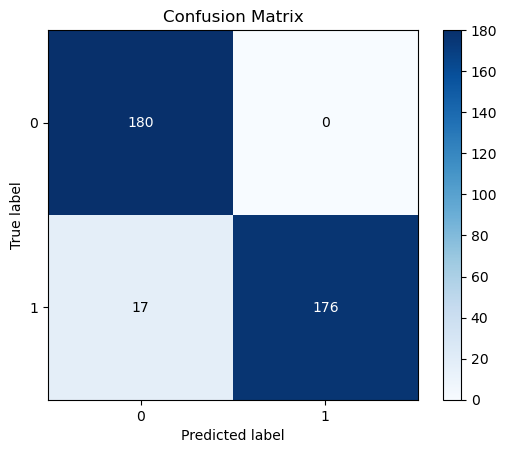

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.83
Test Accuracy: 0.83
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        91
           1       0.87      1.00      0.93        94
           2       0.91      1.00      0.95        95
           3       0.76      0.93      0.84       102
           4       0.98      1.00      0.99       105
           5       0.61      0.61      0.61        89
           6       0.73      0.41      0.52       113

    accuracy                           0.83       689
   macro avg       0.83      0.84      0.82       689
weighted avg       0.83      0.83      0.82       689



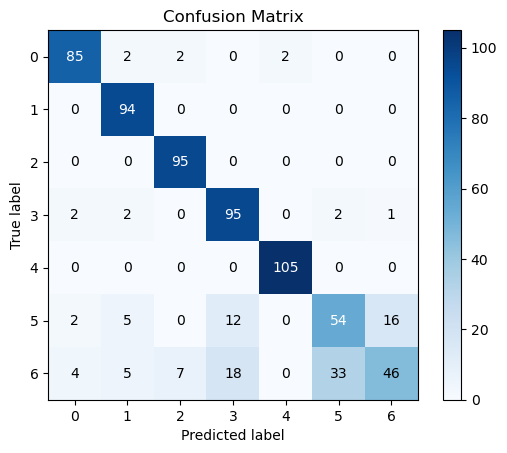

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.90
Test Accuracy: 0.92
              precision    recall  f1-score   support

           0       1.00      0.84      0.91       184
           1       0.85      1.00      0.92       176

    accuracy                           0.92       360
   macro avg       0.93      0.92      0.92       360
weighted avg       0.93      0.92      0.92       360



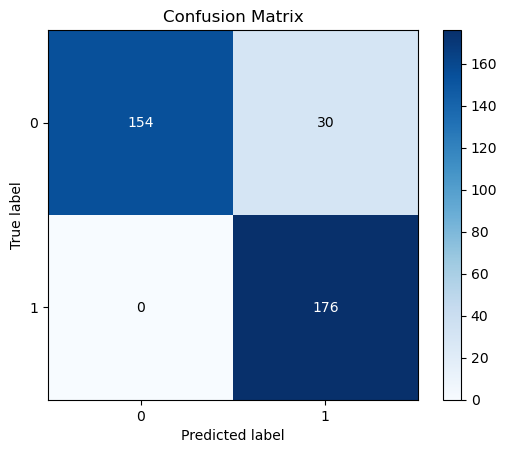

C:\Users\opeye\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Validation Accuracy: 0.83
Test Accuracy: 0.84
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        98
           1       0.81      0.89      0.84        98
           2       0.88      0.64      0.74       118
           3       0.85      0.82      0.83       114
           4       0.82      0.91      0.86       123

    accuracy                           0.84       551
   macro avg       0.84      0.85      0.84       551
weighted avg       0.85      0.84      0.84       551



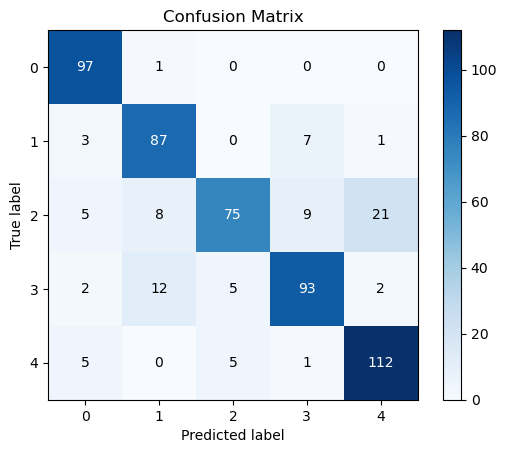

Checking Stage: Breast Cancer Stage | Treatment: Treatments
Checking Stage: Stage 0 | Treatment: Monitoring, surgical removal (excisional biopsy), cryoablation
Checking Stage: Stage 1 | Treatment: Lumpectomy with radiation, mastectomy, hormone therapy (if hormone receptor-positive)
Checking Stage: Stage 2 | Treatment: Lumpectomy or mastectomy, chemotherapy, radiation therapy, hormone or targeted therapy (if HER2-positive)
Checking Stage: Stage 3 | Treatment: Chemotherapy, mastectomy, radiation therapy, targeted therapies (if HER2-positive)
Checking Stage: Breast Cancer Stage | Treatment: Treatments
Checking Stage: Stage 0 | Treatment: Monitoring, surgical removal (excisional biopsy), cryoablation
Checking Stage: Stage 1 | Treatment: Lumpectomy with radiation, mastectomy, hormone therapy (if hormone receptor-positive)
Checking Stage: Stage 2 | Treatment: Lumpectomy or mastectomy, chemotherapy, radiation therapy, hormone or targeted therapy (if HER2-positive)
Checking Stage: Stage 3 | Tr

In [23]:
# XGBoost Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scikitplot as skplt
import matplotlib.pyplot as plt
from bayes_opt import BayesianOptimization
from imblearn.over_sampling import RandomOverSampler
import docx

# Load the dataset (Ensure you replace this with your actual dataset loading method)
# dataset = pd.read_csv('path_to_your_dataset.csv')  # Example loading method

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features

y_diagnosis = dataset['Diagnosis_Status']
y_T = dataset['TNM_T_Stage']  # Target T
y_M = dataset['Metastasis_Status']  # Target M
y_Cancer_Stage = dataset['Cancer_Stage']  # Target Cancer Stage

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)

X_resampled_D, y_resampled_D = ros.fit_resample(X, y_diagnosis)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)

# Function to split the data into train, validation, and test sets
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting for all three targets
X_train_D, X_val_D, X_test_D, y_train_D, y_val_D, y_test_D = train_val_test_split(X_resampled_D, y_resampled_D)
X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_CS, y_resampled_CS)

# Define the bounds of the hyperparameters for Bayesian Optimization
param_bounds = {
    'max_depth': (3, 10),
    'learning_rate': (0.01, 0.3),
    'n_estimators': (100, 500),
    'min_child_weight': (1, 10),
    'subsample': (0.6, 1.0),
    'colsample_bytree': (0.6, 1.0)
}

# Define the objective function for Bayesian Optimization
def xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train):
    """Function to be optimized by Bayesian Optimization for each classifier"""
    model = XGBClassifier(
        max_depth=int(max_depth), 
        learning_rate=learning_rate, 
        n_estimators=int(n_estimators),
        min_child_weight=min_child_weight, 
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        use_label_encoder=False, 
        eval_metric='mlogloss',
        random_state=0
    )
    
    # Perform cross-validation
    cv_results = cross_val_score(model, X_train, y_train, cv=5)  # Adjust cv as necessary
    return cv_results.mean()

# Function for Bayesian Optimization
def bayesian_optimization(X_train, y_train):
    optimizer = BayesianOptimization(
        f=lambda max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree: 
        xgb_cv(max_depth, learning_rate, n_estimators, min_child_weight, subsample, colsample_bytree, X_train, y_train),
        pbounds=param_bounds,
        random_state=0,
        verbose=2
    )
    optimizer.maximize(init_points=5, n_iter=10)
    return optimizer.max['params']

# Optimizing and training for all targets (Diagnosis Status, TNM_T_Stage, Metastasis_Status, Cancer_Stage)
best_params_D = bayesian_optimization(X_train_D, y_train_D)
best_params_T = bayesian_optimization(X_train_T, y_train_T)
best_params_M = bayesian_optimization(X_train_M, y_train_M)
best_params_CS = bayesian_optimization(X_train_CS, y_train_CS)

# Function to train the model with the best parameters and evaluate
def train_evaluate(X_train, y_train, X_val, y_val, X_test, y_test, best_params):
    model = XGBClassifier(
        max_depth=int(best_params['max_depth']),
        learning_rate=best_params['learning_rate'],
        n_estimators=int(best_params['n_estimators']),
        min_child_weight=best_params['min_child_weight'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=0
    )
    model.fit(X_train, y_train)

    # Validation set performance
    y_pred_val = model.predict(X_val)
    accuracy_val = accuracy_score(y_val, y_pred_val)
    print(f"Validation Accuracy: {accuracy_val:.2f}")
    
    # Test set performance
    y_pred_test = model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Test Accuracy: {accuracy_test:.2f}")
    
    # Classification report and confusion matrix
    print(classification_report(y_test, y_pred_test))
    cm = confusion_matrix(y_test, y_pred_test)
    skplt.metrics.plot_confusion_matrix(y_test, y_pred_test, normalize=False)
    plt.show()
    
    return model, y_pred_test

# Train and evaluate the models for all stages
model_D, y_pred_test_D = train_evaluate(X_train_D, y_train_D, X_val_D, y_val_D, X_test_D, y_test_D, best_params_D)
model_T, y_pred_test_T = train_evaluate(X_train_T, y_train_T, X_val_T, y_val_T, X_test_T, y_test_T, best_params_T)
model_M, y_pred_test_M = train_evaluate(X_train_M, y_train_M, X_val_M, y_val_M, X_test_M, y_test_M, best_params_M)
model_CS, y_pred_test_CS = train_evaluate(X_train_CS, y_train_CS, X_val_CS, y_val_CS, X_test_CS, y_test_CS, best_params_CS)

# Function to extract treatment data from a table in a Word document
def get_treatment_from_docx_table(stage, docx_path):
    doc = docx.Document(docx_path)
    treatment = "Unknown Treatment"

    for table in doc.tables:
        # Iterate over the rows in the table
        for row in table.rows:
            # Assuming the first column contains the stage and the third column contains the treatment
            stage_text = row.cells[0].text.strip()
            # Treatment is in the third cell
            treatment_text = row.cells[2].text.strip() if len(row.cells) > 2 else ""

            # Debugging output to see what stages and treatments are being processed
            print(f"Checking Stage: {stage_text} | Treatment: {treatment_text}")
            
            # Check if the stage matches
            if stage_text.lower() == f"stage {stage}".lower():  # Case insensitive comparison
                treatment = treatment_text
                break
        if treatment != "Unknown Treatment":
            break  # Exit once the treatment is found

    return treatment

# Specify the path to your Word document containing the treatment table
docx_path = "numerical_breast_cancer_stages_treatments.docx"  # Adjust path as necessary

# Get treatments for the predicted cancer stages
predicted_treatments = [get_treatment_from_docx_table(stage, docx_path) for stage in y_pred_test_CS]

# Combine results and treatments into one DataFrame
results_cs = pd.DataFrame({
    'Cancer Stage': y_pred_test_CS,
    'Treatment': predicted_treatments
})

# Save the data to a new CSV file (optional)
combined_results.to_csv('XGB_Final_combined_results.csv', index=False)

print(results_cs)

# Save the data to a new CSV file (optional)
results_cs.to_csv('XGB_Final_combined_Cancer_stage_and_Treatment_results.csv', index=False)



In [25]:
pip install Flask


# XGBOOST PREDICTION MODEL

In [24]:
import joblib

# Save each model to a file
joblib.dump(model_D, 'xgb_diagnosis_model.pkl')
joblib.dump(model_T, 'xgb_tnm_t_model.pkl')
joblib.dump(model_M, 'xgb_metastasis_model.pkl')
joblib.dump(model_CS, 'xgb_cancer_stage_model.pkl')


['xgb_cancer_stage_model.pkl']

|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.775     | 31.95     | 0.7437    | 2.808     | 6.359     | 269.5     |
| 2         | 0.7477    | 35.84     | 0.4938    | 3.675     | 9.709     | 253.4     |
| 3         | 0.7604    | 41.67     | 0.576     | 2.704     | 9.405     | 128.4     |
| 4         | 0.7495    | 13.49     | 0.1182    | 3.498     | 8.225     | 448.0     |
| 5         | 0.7568    | 49.14     | 0.8192    | 2.384     | 8.244     | 147.3     |
| 6         | 0.8203    | 26.3      | 0.2329    | 1.599     | 3.971     | 233.8     |
| 7         | 0.7985    | 48.9      | 0.9913    | 2.908     | 3.225     | 226.1     |
| 8         | 0.8221    | 49.15     | 0.7733    | 1.047     | 3.807     | 127.5     |
| 9         | 0.8221    | 49.16     | 0.7847    | 1.051     | 3.811     | 127.5     |
| 10        | 0.8221    | 50.0      | 1.0       | 1.0 

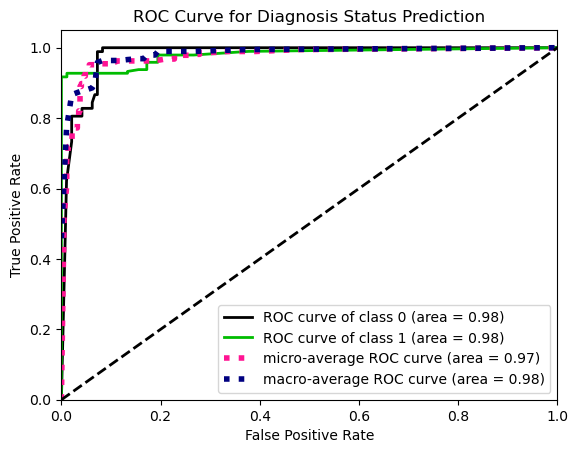

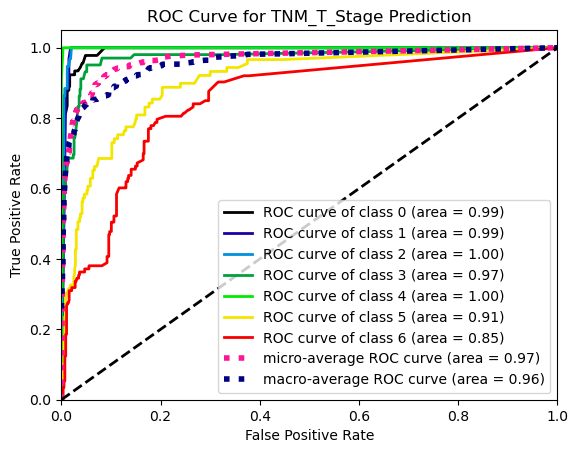

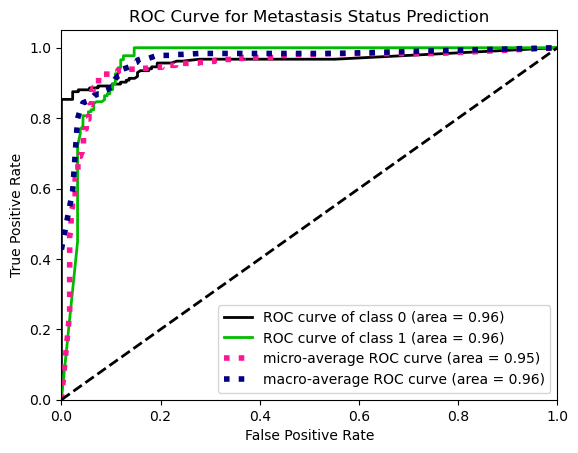

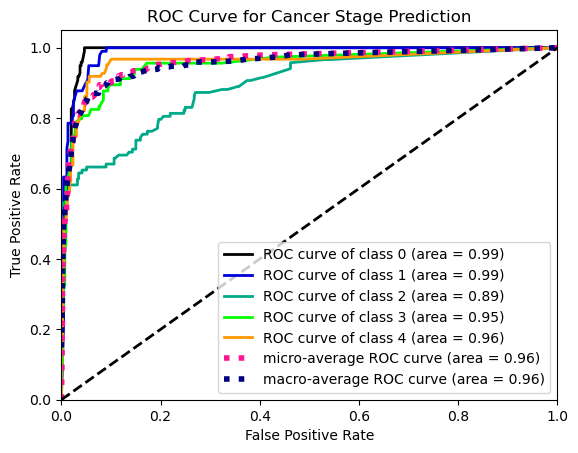

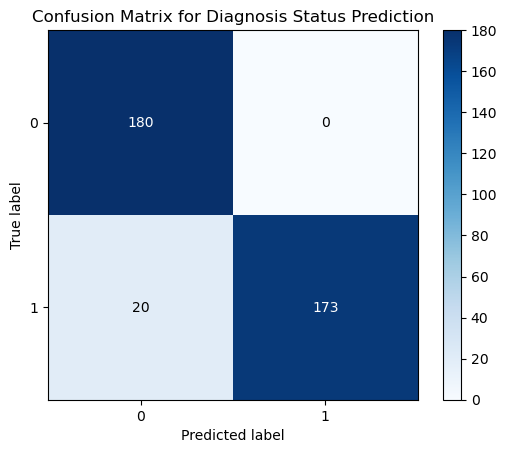

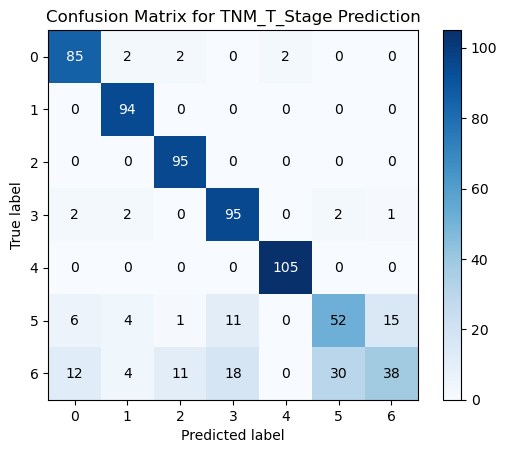

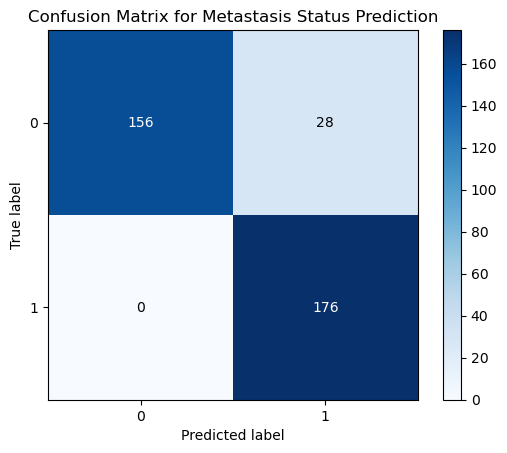

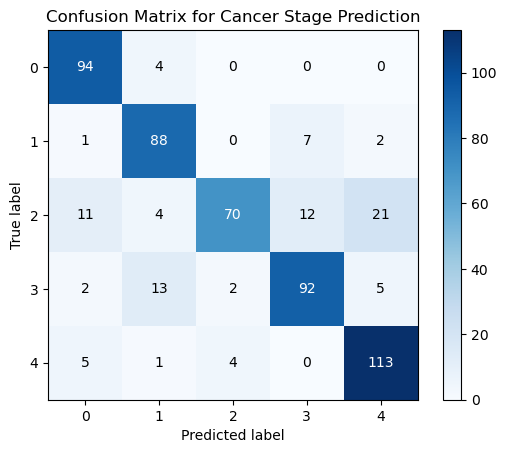

                  Type  Training Data  Validation Data  Actual Test Data  \
0     Diagnosis Status              1                1                 0   
1     Diagnosis Status              0                1                 1   
2     Diagnosis Status              0                1                 0   
3     Diagnosis Status              0                1                 1   
4     Diagnosis Status              1                0                 0   
...                ...            ...              ...               ...   
1968      Cancer Stage              1                2                 1   
1969      Cancer Stage              0                0                 1   
1970      Cancer Stage              2                3                 1   
1971      Cancer Stage              1                1                 1   
1972      Cancer Stage              4                0                 4   

      Predicted Test Data  Test Error  
0                       0           0  
1      

In [ ]:
# Random Forest Classifier 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scikitplot as skplt  # For ROC and Confusion Matrix plots
from bayes_opt import BayesianOptimization
from imblearn.over_sampling import RandomOverSampler
import docx
# Load the dataset
dataset

# Independent (X) and dependent (y) variables
X = dataset[['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features

y_diagnosis = dataset['Diagnosis_Status']
y_T = dataset['TNM_T_Stage']  # Target T
y_M = dataset['Metastasis_Status']  # Target M
y_Cancer_Stage = dataset['Cancer_Stage']  # Target Cancer Stage

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)

X_resampled_D, y_resampled_D = ros.fit_resample(X, y_diagnosis)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)

# Function to split the data into train, validation, and test sets
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

# Splitting for all three targets
X_train_D, X_val_D, X_test_D, y_train_D, y_val_D, y_test_D = train_val_test_split(X_resampled_D, y_resampled_D)
X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_CS, y_resampled_CS)

# Function to optimize using Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0,
        class_weight='balanced'
    )
    
    # Fit on the training data for target T (can be extended to M, CS)
    rf_classifier.fit(X_train_D, y_train_D)
    y_pred_val = rf_classifier.predict(X_val_D)
    accuracy_val = accuracy_score(y_val_D, y_pred_val)

    rf_classifier.fit(X_train_T, y_train_T)
    y_pred_val = rf_classifier.predict(X_val_T)
    accuracy_val = accuracy_score(y_val_T, y_pred_val)

    rf_classifier.fit(X_train_M, y_train_M)
    y_pred_val = rf_classifier.predict(X_val_M)
    accuracy_val = accuracy_score(y_val_M, y_pred_val)

    rf_classifier.fit(X_train_CS, y_train_CS)
    y_pred_val = rf_classifier.predict(X_val_CS)
    accuracy_val = accuracy_score(y_val_CS, y_pred_val)
    
    return accuracy_val

# Bayesian Optimization
rf_bo = BayesianOptimization(
    f=rf_cv,
    pbounds={
        'n_estimators': (100, 500),
        'max_depth': (10, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 4),
        'max_features': (0.1, 1.0),
    },
    random_state=0,
    verbose=2
)

rf_bo.maximize(init_points=5, n_iter=20)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_D = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

best_params = rf_bo.max['params']
best_rf_classifier_T = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

best_rf_classifier_M = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

best_rf_classifier_CS = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Fit the best model on the training data
best_rf_classifier_D.fit(X_train_D, y_train_D)
best_rf_classifier_T.fit(X_train_T, y_train_T)
best_rf_classifier_M.fit(X_train_M, y_train_M)
best_rf_classifier_CS.fit(X_train_CS, y_train_CS)

# Predict and evaluate on Validation data
y_pred_val_D = best_rf_classifier_D.predict(X_val_D)
accuracy_val_D = accuracy_score(y_val_D, y_pred_val_D)
print("Validation Accuracy for Diagnosis Status after Bayesian Optimization:", accuracy_val_D)

y_pred_val_T = best_rf_classifier_T.predict(X_val_T)
accuracy_val_T = accuracy_score(y_val_T, y_pred_val_T)
print("Validation Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_val_T)

y_pred_val_M = best_rf_classifier_M.predict(X_val_M)
accuracy_val_M = accuracy_score(y_val_M, y_pred_val_M)
print("Validation Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_val_M)

y_pred_val_CS = best_rf_classifier_CS.predict(X_test_CS)
accuracy_val_CS = accuracy_score(y_val_CS, y_pred_val_CS)
print("Validation Accuracy for Cancer Stage after Bayesian Optimization:", accuracy_val_CS)

# Predict and evaluate on test data
y_pred_test_D = best_rf_classifier_D.predict(X_test_D)
accuracy_test_D = accuracy_score(y_test_D, y_pred_test_D)
print("Test Accuracy for Diagnosis Status after Bayesian Optimization:", accuracy_test_D)

y_pred_test_T = best_rf_classifier_T.predict(X_test_T)
accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_T)

y_pred_test_M = best_rf_classifier_M.predict(X_test_M)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_M)

y_pred_test_CS = best_rf_classifier_CS.predict(X_test_CS)
accuracy_test_CS = accuracy_score(y_test_CS, y_pred_test_CS)
print("Test Accuracy for Cancer Stage after Bayesian Optimization:", accuracy_test_CS)

# Classification Report
print(classification_report(y_test_D, y_pred_test_D))
print(classification_report(y_test_T, y_pred_test_T))
print(classification_report(y_test_M, y_pred_test_M))
print(classification_report(y_test_CS, y_pred_test_CS))

# AUC Score and ROC Plot
# Calculate AUC score for Diagnosis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_D, y_pred_test_D)
    print(f"AUC Score for Diagnosis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")
    
y_pred_proba_T = best_rf_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_rf_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)


# Plot ROC Curve
# Plot ROC Curve for Diagnosis status prediction
y_pred_proba_D = best_rf_classifier_D.predict_proba(X_test_D)
skplt.metrics.plot_roc(y_test_D, y_pred_proba_D, title='ROC Curve for Diagnosis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_rf_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_D, y_pred_test_D, normalize=False, title='Confusion Matrix for Diagnosis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_CS, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()


# 4. Results Presentation
results_D = pd.DataFrame({
    'Type': ['Diagnosis Status'] * len(y_test_D),
    'Training Data': pd.Series(y_train_D[:len(y_test_D)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_D[:len(y_test_D)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_D).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_D).reset_index(drop=True),
    'Test Error': pd.Series(y_test_D).reset_index(drop=True) - pd.Series(y_pred_test_D).reset_index(drop=True)
})

results_T = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_T),
    'Training Data': pd.Series(y_train_T[:len(y_test_T)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_T[:len(y_test_T)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_T).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_T).reset_index(drop=True),
    'Test Error': pd.Series(y_test_T).reset_index(drop=True) - pd.Series(y_pred_test_T).reset_index(drop=True)
})

results_M = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_M),
    'Training Data': pd.Series(y_train_M[:len(y_test_M)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_M[:len(y_test_M)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_M).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_M).reset_index(drop=True),
    'Test Error': pd.Series(y_test_M).reset_index(drop=True) - pd.Series(y_pred_test_M).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_CS),
    'Training Data': pd.Series(y_train_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_CS).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_cs).reset_index(drop=True),
    'Test Error': pd.Series(y_test_CS).reset_index(drop=True) - pd.Series(y_pred_test_cs).reset_index(drop=True)
})

# Combine all results into one DataFrame
combined_results = pd.concat([results_D, results_T, results_M, results_cs], ignore_index=True)

print(combined_results)

import docx
import pandas as pd

# Function to extract treatment data from a table in a Word document
def get_treatment_from_docx_table(stage, docx_path):
    doc = docx.Document(docx_path)
    treatment = "Unknown Treatment"

    for table in doc.tables:
        # Iterate over the rows in the table
        for row in table.rows:
            # Assuming the first column contains the stage and the third column contains the treatment
            stage_text = row.cells[0].text.strip()
            # Treatment is in the third cell
            treatment_text = row.cells[2].text.strip() if len(row.cells) > 2 else ""

            # Debugging output to see what stages and treatments are being processed
            print(f"Checking Stage: {stage_text} | Treatment: {treatment_text}")
            
            # Check if the stage matches
            if stage_text.lower() == f"stage {stage}".lower():  # Case insensitive comparison
                treatment = treatment_text
                break
        if treatment != "Unknown Treatment":
            break  # Exit once the treatment is found

    return treatment

# Specify the path to your Word document containing the treatment table
docx_path = "numerical_breast_cancer_stages_treatments.docx"

# Get treatments for the predicted cancer stages
predicted_treatments = [get_treatment_from_docx_table(stage, docx_path) for stage in y_pred_test_CS]

# Combine results and treatments into one DataFrame
results_cs = pd.DataFrame({
    'Cancer Stage': y_pred_test_CS,
    'Treatment': predicted_treatments
})

# Save the data to a new CSV file (optional)
combined_results.to_csv('RF_Final_combined_results.csv', index=False)

print(results_cs)

# Save the data to a new CSV file (optional)
results_cs.to_csv('RF_Final_combined_Cancer_stage_and_Treatment_results.csv', index=False)


# RANDOM FOREST MODEL

In [28]:
# Save the trained models
joblib.dump(best_rf_classifier_D, 'best_rf_classifier_D.pkl')
joblib.dump(best_rf_classifier_T, 'best_rf_classifier_T.pkl')
joblib.dump(best_rf_classifier_M, 'best_rf_classifier_M.pkl')
joblib.dump(best_rf_classifier_CS, 'best_rf_classifier_CS.pkl')


['best_rf_classifier_CS.pkl']

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Validation Accuracy for Diagnosis Status: 0.9785522788203753
Validation Accuracy for Tumor Size: 0.9622641509433962
Validation Accuracy for Metastasis Status: 0.975
Validation Accuracy for Cancer Stage : 0.9382940108892922
Test Accuracy for Diagnosis: 0.967828418230563
Test Accuracy for Tumor Size: 0.8548621190130624
Test Accuracy for Metastasis Status: 0.9111111111111111
Test Accuracy for Cancer Stage : 0.8548094373865699
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       180
           1       1.00      0.94      0.97       193

    accuracy                           0.97       373
   macro avg       0.97      0.97      0.97       373
weighted avg       0.97      0.97      0.97       373

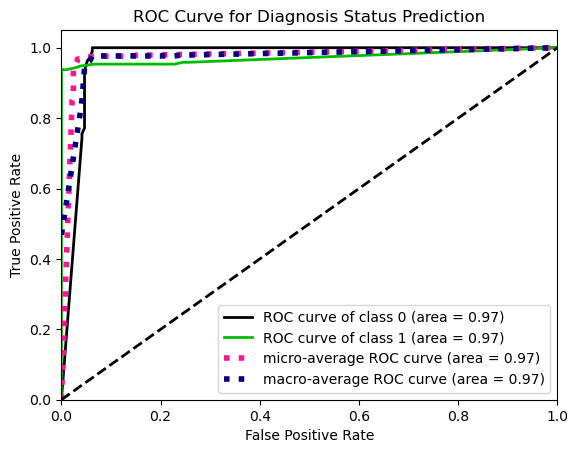

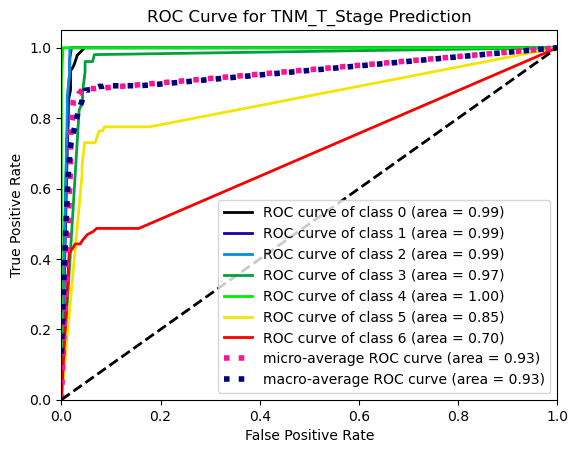

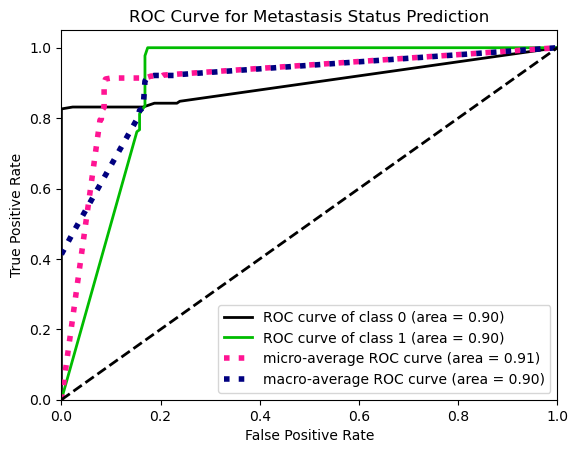

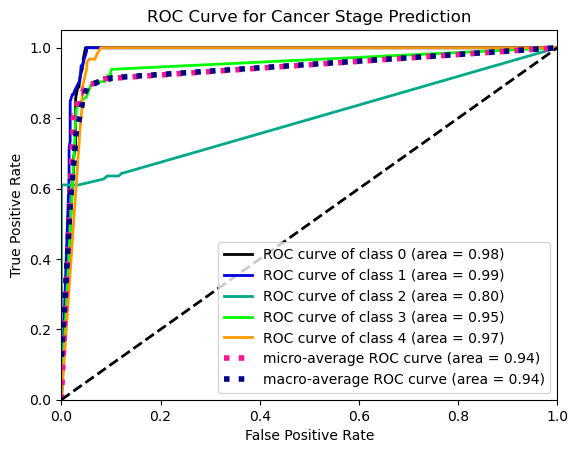

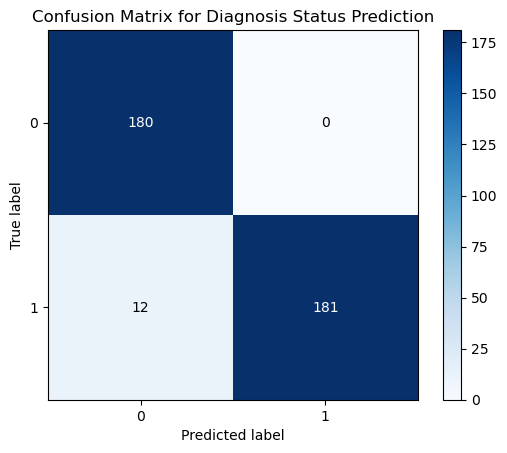

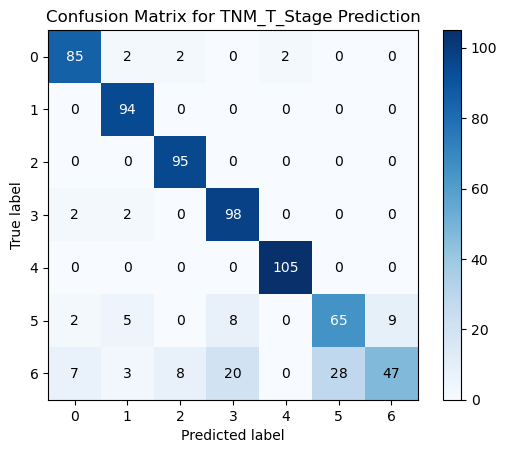

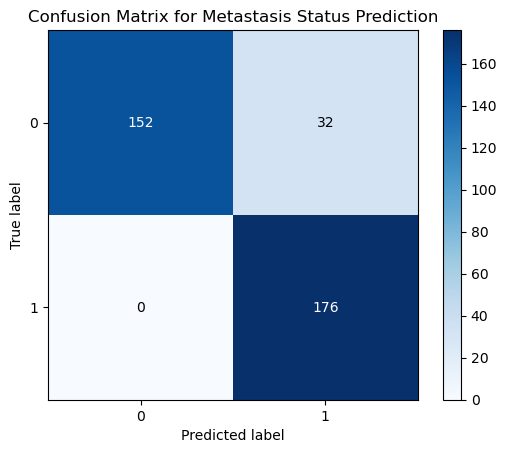

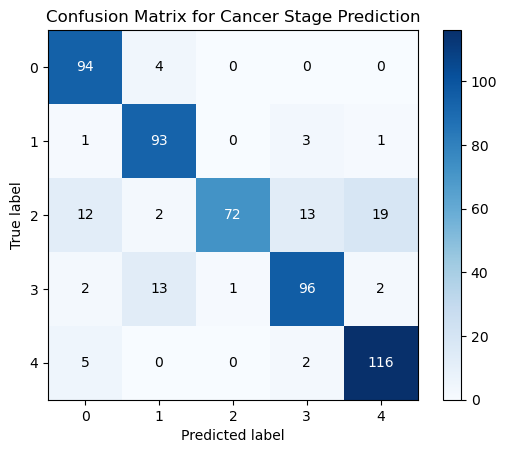

                  Type  Training Data  Validation Data  Actual Test Data  \
0     Diagnosis Status              1                1                 0   
1     Diagnosis Status              0                1                 1   
2     Diagnosis Status              0                1                 0   
3     Diagnosis Status              0                1                 1   
4     Diagnosis Status              1                0                 0   
...                ...            ...              ...               ...   
1968      Cancer Stage              1                2                 1   
1969      Cancer Stage              0                0                 1   
1970      Cancer Stage              2                3                 1   
1971      Cancer Stage              1                1                 1   
1972      Cancer Stage              4                0                 4   

      Predicted Test Data  Test Error  
0                       0           0  
1      

In [30]:
# Decision Tree Classifier
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import scikitplot as skplt
from bayes_opt import BayesianOptimization
from imblearn.over_sampling import RandomOverSampler
import docx

# Import the dataset
dataset # Replace with actual dataset path

# Independent (X) and dependent (y) variables
X = dataset [['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status']]  # Features

y_diagnosis = dataset ['Diagnosis_Status']
y_T = dataset ['TNM_T_Stage']  # Target T
y_M = dataset ['Metastasis_Status']  # Target M
y_Cancer_Stage = dataset['Cancer_Stage'].values.ravel()


# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)

X_resampled_D, y_resampled_D = ros.fit_resample(X, y_diagnosis)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)

# 2. Data Splitting
X_trainval_D, X_test_D, y_trainval_D, y_test_D = train_test_split(X_resampled_D, y_resampled_D, test_size=0.2, random_state=0)
X_train_D, X_val_D, y_train_D, y_val_D = train_test_split(X_trainval_D, y_trainval_D, test_size=0.25, random_state=0)

X_trainval_T, X_test_T, y_trainval_T, y_test_T = train_test_split(X_resampled_T, y_resampled_T, test_size=0.2, random_state=0)
X_train_T, X_val_T, y_train_T, y_val_T = train_test_split(X_trainval_T, y_trainval_T, test_size=0.25, random_state=0)

X_trainval_M, X_test_M, y_trainval_M, y_test_M = train_test_split(X_resampled_M, y_resampled_M, test_size=0.2, random_state=0)
X_train_M, X_val_M, y_train_M, y_val_M = train_test_split(X_trainval_M, y_trainval_M, test_size=0.25, random_state=0)

X_trainval_CS, X_test_CS, y_trainval_CS, y_test_CS = train_test_split(X_resampled_CS, y_resampled_CS, test_size=0.2, random_state=0)
X_train_CS, X_val_CS, y_train_CS, y_val_CS = train_test_split(X_trainval_CS, y_trainval_CS, test_size=0.25, random_state=0)


# 3. Model Selection and Training
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

dt_classifier_D = DecisionTreeClassifier(random_state=0)
dt_classifier_T = DecisionTreeClassifier(random_state=0)
dt_classifier_M = DecisionTreeClassifier(random_state=0)
dt_classifier_CS = DecisionTreeClassifier(random_state=0)


random_search_D = RandomizedSearchCV(estimator=dt_classifier_D, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_T = RandomizedSearchCV(estimator=dt_classifier_T, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_M = RandomizedSearchCV(estimator=dt_classifier_M, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)
random_search_CS = RandomizedSearchCV(estimator=dt_classifier_CS, param_distributions=param_grid, n_iter=50,
                                      scoring='accuracy', cv=5, verbose=1, random_state=0, n_jobs=-1)


random_search_D.fit(X_trainval_D, y_trainval_D)
random_search_T.fit(X_trainval_T, y_trainval_T)
random_search_M.fit(X_trainval_M, y_trainval_M)
random_search_CS.fit(X_trainval_CS, y_trainval_CS)

best_dt_classifier_D = random_search_D.best_estimator_
best_dt_classifier_T = random_search_T.best_estimator_
best_dt_classifier_M = random_search_M.best_estimator_
best_dt_classifier_CS = random_search_CS.best_estimator_

y_pred_val_D = best_dt_classifier_D.predict(X_val_D)
y_pred_val_T = best_dt_classifier_T.predict(X_val_T)
y_pred_val_M = best_dt_classifier_M.predict(X_val_M)
y_pred_val_CS = best_dt_classifier_CS.predict(X_val_CS)

accuracy_val_D = accuracy_score(y_val_D, y_pred_val_D)
accuracy_val_T = accuracy_score(y_val_T, y_pred_val_T)
accuracy_val_M = accuracy_score(y_val_M, y_pred_val_M)
accuracy_val_CS = accuracy_score(y_val_CS, y_pred_val_CS)

print("Validation Accuracy for Diagnosis Status:", accuracy_val_D)
print("Validation Accuracy for Tumor Size:", accuracy_val_T)
print("Validation Accuracy for Metastasis Status:", accuracy_val_M)
print("Validation Accuracy for Cancer Stage :", accuracy_val_CS)

y_pred_test_D = best_dt_classifier_D.predict(X_test_D)
y_pred_test_T = best_dt_classifier_T.predict(X_test_T)
y_pred_test_M = best_dt_classifier_M.predict(X_test_M)
y_pred_test_CS = best_dt_classifier_CS.predict(X_test_CS)

accuracy_test_D = accuracy_score(y_test_D, y_pred_test_D)
accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
accuracy_test_CS = accuracy_score(y_test_CS, y_pred_test_CS)

print("Test Accuracy for Diagnosis:", accuracy_test_D)
print("Test Accuracy for Tumor Size:", accuracy_test_T)
print("Test Accuracy for Metastasis Status:", accuracy_test_M)
print("Test Accuracy for Cancer Stage :", accuracy_test_CS)

# Classification Report
print(classification_report(y_test_D, y_pred_test_D))
print(classification_report(y_test_T, y_pred_test_T))
print(classification_report(y_test_M, y_pred_test_M))
print(classification_report(y_test_CS, y_pred_test_CS))

# AUC Score and ROC Plot
# Calculate AUC score for Diagnosis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_D, y_pred_test_D)
    print(f"AUC Score for Diagnosis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_T = best_dt_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_dt_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)

# Plot ROC Curve
y_pred_proba_D = best_dt_classifier_D.predict_proba(X_test_D)
skplt.metrics.plot_roc(y_test_D, y_pred_proba_D, title='ROC Curve for Diagnosis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_dt_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_D, y_pred_test_D, normalize=False, title='Confusion Matrix for Diagnosis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_CS, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()


# 4. Results Presentation
results_D = pd.DataFrame({
    'Type': ['Diagnosis Status'] * len(y_test_D),
    'Training Data': pd.Series(y_train_D[:len(y_test_D)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_D[:len(y_test_D)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_D).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_D).reset_index(drop=True),
    'Test Error': pd.Series(y_test_D).reset_index(drop=True) - pd.Series(y_pred_test_D).reset_index(drop=True)
})

results_T = pd.DataFrame({
    'Type': ['TNM_T_Stage'] * len(y_test_T),
    'Training Data': pd.Series(y_train_T[:len(y_test_T)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_T[:len(y_test_T)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_T).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_T).reset_index(drop=True),
    'Test Error': pd.Series(y_test_T).reset_index(drop=True) - pd.Series(y_pred_test_T).reset_index(drop=True)
})

results_M = pd.DataFrame({
    'Type': ['Lymph Node Status'] * len(y_test_M),
    'Training Data': pd.Series(y_train_M[:len(y_test_M)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_M[:len(y_test_M)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_M).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_M).reset_index(drop=True),
    'Test Error': pd.Series(y_test_M).reset_index(drop=True) - pd.Series(y_pred_test_M).reset_index(drop=True)
})

results_cs = pd.DataFrame({
    'Type': ['Cancer Stage'] * len(y_test_CS),
    'Training Data': pd.Series(y_train_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Validation Data': pd.Series(y_val_CS[:len(y_test_CS)]).reset_index(drop=True),
    'Actual Test Data': pd.Series(y_test_CS).reset_index(drop=True),
    'Predicted Test Data': pd.Series(y_pred_test_CS).reset_index(drop=True),
    'Test Error': pd.Series(y_test_CS).reset_index(drop=True) - pd.Series(y_pred_test_CS).reset_index(drop=True)
})

# Combine all results into one DataFrame
combined_results = pd.concat([results_D, results_T, results_M, results_cs], ignore_index=True)

print(combined_results)

# Function to extract treatment data from a table in a Word document
def get_treatment_from_docx_table(stage, docx_path):
    doc = docx.Document(docx_path)
    treatment = "Unknown Treatment"

    for table in doc.tables:
        # Iterate over the rows in the table
        for row in table.rows:
            # Assuming the first column contains the stage and the third column contains the treatment
            stage_text = row.cells[0].text.strip()
            # Treatment is in the third cell
            treatment_text = row.cells[2].text.strip() if len(row.cells) > 2 else ""

            # Debugging output to see what stages and treatments are being processed
            print(f"Checking Stage: {stage_text} | Treatment: {treatment_text}")
            
            # Check if the stage matches
            if stage_text.lower() == f"stage {stage}".lower():  # Case insensitive comparison
                treatment = treatment_text
                break
        if treatment != "Unknown Treatment":
            break  # Exit once the treatment is found

    return treatment

# Specify the path to your Word document containing the treatment table
docx_path = "numerical_breast_cancer_stages_treatments.docx"  # Adjust path as necessary

# Get treatments for the predicted cancer stages
predicted_treatments = [get_treatment_from_docx_table(stage, docx_path) for stage in y_pred_test_CS]

# Combine results and treatments into one DataFrame
results_cs = pd.DataFrame({
    'Cancer Stage': y_pred_test_CS,
    'Treatment': predicted_treatments
})

# Save the data to a new CSV file (optional)
combined_results.to_csv('DT_Final_combined_results.csv', index=False)

print(results_cs)

# Save the data to a new CSV file (optional)
results_cs.to_csv('DT_Final_combined_Cancer_stage_and_Treatment_results.csv', index=False)


# DECISION TREE MODEL

In [31]:
# After the model selection and training part

import joblib

# Save the best models for each target
joblib.dump(best_dt_classifier_D, 'dt_diagnosis_model.pkl')
joblib.dump(best_dt_classifier_T, 'dt_tnm_t_model.pkl')
joblib.dump(best_dt_classifier_M, 'dt_metastasis_model.pkl')
joblib.dump(best_dt_classifier_CS, 'dt_cancer_stage_model.pkl')

print("Models saved successfully.")


Models saved successfully.


|   iter    |  target   | max_depth | max_fe... | min_sa... | min_sa... | n_esti... |
-------------------------------------------------------------------------------------
| 1         | 0.8074    | 31.95     | 0.7437    | 2.808     | 6.359     | 269.5     |
| 2         | 0.7685    | 35.84     | 0.4938    | 3.675     | 9.709     | 253.4     |
| 3         | 0.7646    | 41.67     | 0.576     | 2.704     | 9.405     | 128.4     |
| 4         | 0.7685    | 13.49     | 0.1182    | 3.498     | 8.225     | 448.0     |
| 5         | 0.7821    | 49.14     | 0.8192    | 2.384     | 8.244     | 147.3     |
| 6         | 0.8658    | 26.3      | 0.2329    | 1.599     | 3.971     | 233.8     |
| 7         | 0.8054    | 48.9      | 0.9913    | 2.908     | 3.225     | 226.1     |
| 8         | 0.8696    | 49.15     | 0.7733    | 1.047     | 3.807     | 127.5     |
| 9         | 0.8696    | 49.16     | 0.778     | 1.054     | 3.814     | 127.5     |
| 10        | 0.7568    | 50.0      | 1.0       | 4.0 

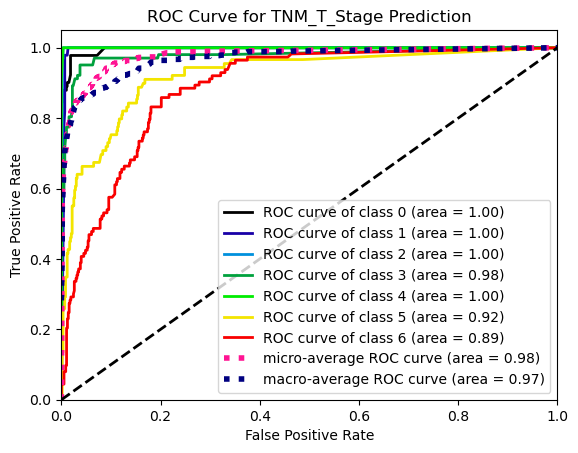

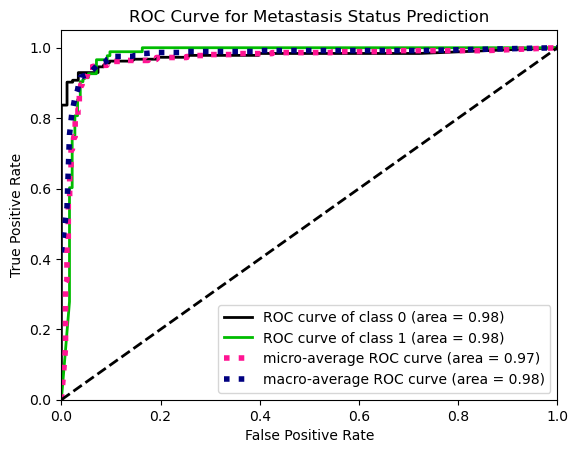

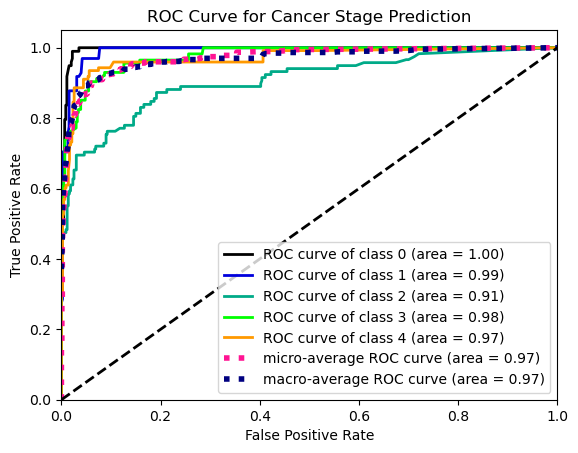

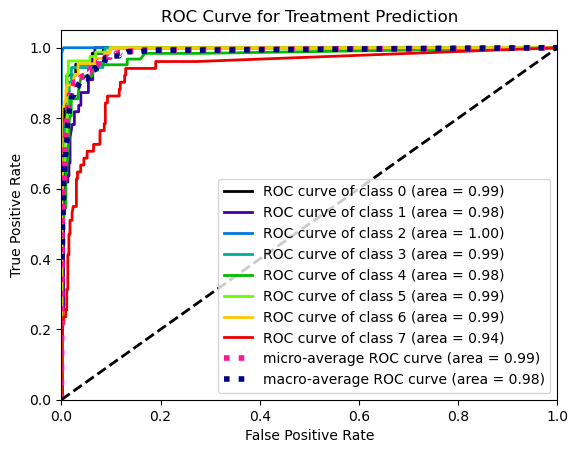

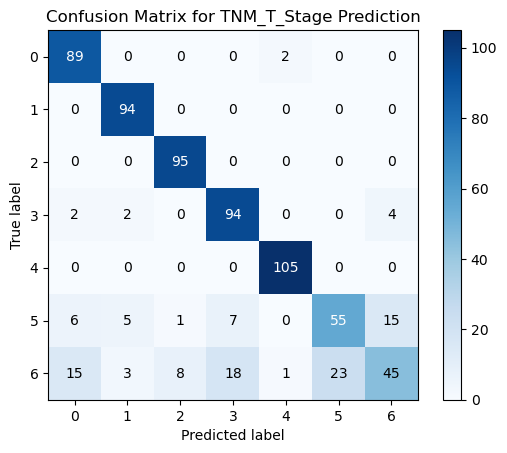

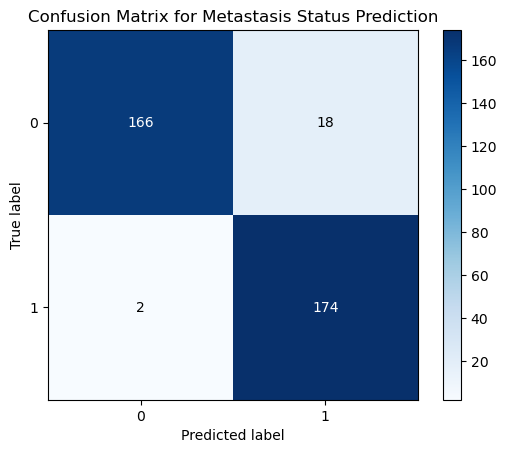

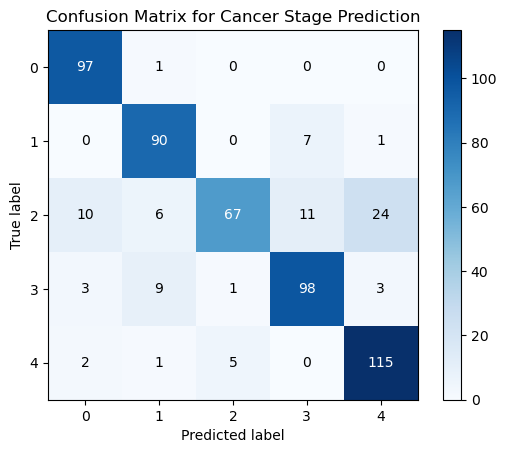

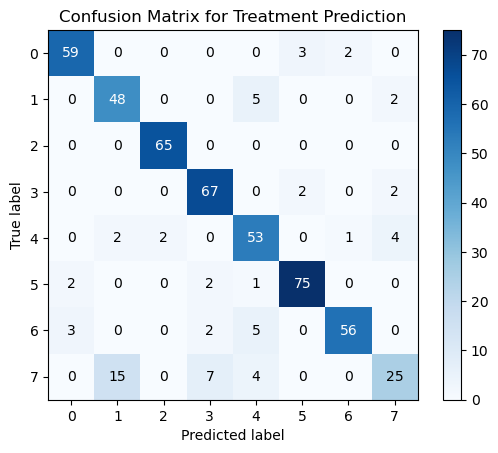

ValueError: All arrays must be of the same length

In [15]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
import scikitplot as skplt  # For ROC and Confusion Matrix plots

# Import the dataset
sampled_data # Replace with actual dataset path

# Independent (X) and dependent (y) variables
X = sampled_data [['Age', 'Smoking_Status', 'Family_History_of_Breast_Cancer', 'Menopausal_Status', 'Genetic_Mutation', 'Lymph_Node_Status', 'Hormone_Receptor_Status']]  # Features
y_T = sampled_data ['TNM_T_Stage']  # Target T
y_M = sampled_data ['Metastasis_Status']  # Target M
y_Cancer_Stage = sampled_data['Cancer_Stage'].values.ravel()
y_Treatment = sampled_data['Treatment'].values.ravel()

ros_cs = RandomOverSampler(random_state=0)

# Resample the training data to handle class imbalance for each output
ros = RandomOverSampler(random_state=0)
X_resampled_T, y_resampled_T = ros.fit_resample(X, y_T)
X_resampled_M, y_resampled_M = ros.fit_resample(X, y_M)
X_resampled_CS, y_resampled_CS = ros.fit_resample(X, y_Cancer_Stage)
X_resampled_Tr, y_Treatment_resampled = ros.fit_resample(X, y_Treatment)

# Split the data into training, validation, and testing sets for each target
def train_val_test_split(X_resampled, y_resampled):
    X_trainval, X_test, y_trainval, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)
    return X_train, X_val, X_test, y_train, y_val, y_test

X_train_T, X_val_T, X_test_T, y_train_T, y_val_T, y_test_T = train_val_test_split(X_resampled_T, y_resampled_T)
X_train_M, X_val_M, X_test_M, y_train_M, y_val_M, y_test_M = train_val_test_split(X_resampled_M, y_resampled_M)
X_train_CS, X_val_CS, X_test_CS, y_train_CS, y_val_CS, y_test_CS = train_val_test_split(X_resampled_cs,  y_Cancer_Stage_resampled)
X_train_tr, X_val_tr, X_test_tr, y_train_tr, y_val_tr, y_test_tr = train_val_test_split(X_resampled_Tr,  y_Treatment_resampled)

# Function to optimize using Bayesian Optimization
def rf_cv(n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features):
    n_estimators = int(n_estimators)
    max_depth = int(max_depth)
    min_samples_split = int(min_samples_split)
    min_samples_leaf = int(min_samples_leaf)
    
    rf_classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=0,
        class_weight='balanced'
    )
    
    # Fit on the training data for target T (can be extended to M, CS)
    rf_classifier.fit(X_train_T, y_train_T)
    y_pred_val = rf_classifier.predict(X_val_T)
    accuracy_val = accuracy_score(y_val_T, y_pred_val)

    rf_classifier.fit(X_train_M, y_train_M)
    y_pred_val = rf_classifier.predict(X_val_M)
    accuracy_val = accuracy_score(y_val_M, y_pred_val)

    rf_classifier.fit(X_train_CS, y_train_CS)
    y_pred_val = rf_classifier.predict(X_val_CS)
    accuracy_val = accuracy_score(y_val_CS, y_pred_val)

    rf_classifier.fit(X_train_tr, y_train_tr)
    y_pred_val = rf_classifier.predict(X_val_tr)
    accuracy_val = accuracy_score(y_val_tr, y_pred_val)

    
    return accuracy_val

# Bayesian Optimization
rf_bo = BayesianOptimization(
    f=rf_cv,
    pbounds={
        'n_estimators': (100, 500),
        'max_depth': (10, 50),
        'min_samples_split': (2, 10),
        'min_samples_leaf': (1, 4),
        'max_features': (0.1, 1.0),
    },
    random_state=0,
    verbose=2
)

rf_bo.maximize(init_points=5, n_iter=20)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_T = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_M = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_CS = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)

# Best parameters
best_params = rf_bo.max['params']
best_rf_classifier_tr = RandomForestClassifier(
    n_estimators=int(best_params['n_estimators']),
    max_depth=int(best_params['max_depth']),
    min_samples_split=int(best_params['min_samples_split']),
    min_samples_leaf=int(best_params['min_samples_leaf']),
    max_features=best_params['max_features'],
    random_state=0,
    class_weight='balanced'
)
# Fit the best model on the training data for TNM_T_Stage
best_rf_classifier_T.fit(X_train_T, y_train_T)
best_rf_classifier_M.fit(X_train_M, y_train_M)
best_rf_classifier_CS.fit(X_train_CS, y_train_CS)
best_rf_classifier_tr.fit(X_train_tr, y_train_tr)

# Predict and evaluate on test data
y_pred_test_T = best_rf_classifier_T.predict(X_test_T)
accuracy_test_T = accuracy_score(y_test_T, y_pred_test_T)
print("Test Accuracy for TNM_T_Stage after Bayesian Optimization:", accuracy_test_T)

# Similarly for lymph node and metastasis classifiers, you can follow the same approach
y_pred_test_M = best_rf_classifier_M.predict(X_test_M)
accuracy_test_M = accuracy_score(y_test_M, y_pred_test_M)
print("Test Accuracy for Metastasis Status after Bayesian Optimization:", accuracy_test_M)

y_pred_test_cs = best_rf_classifier_CS.predict(X_test_CS)
accuracy_test_cs = accuracy_score(y_test_CS, y_pred_test_cs)
print("Test Accuracy for Cancer Stage  after Bayesian Optimization:", accuracy_test_cs)

y_pred_test_tr = best_rf_classifier_tr.predict(X_test_tr)
accuracy_test_tr = accuracy_score(y_test_tr, y_pred_test_tr)
print("Test Accuracy for Treatmen  after Bayesian Optimization:", accuracy_test_tr)

# AUC Score and ROC Plot
y_pred_proba_T = best_rf_classifier_T.predict_proba(X_test_T)
auc_T = roc_auc_score(y_test_T, y_pred_proba_T, multi_class='ovr')
print("AUC Score for TNM_T_Stage Prediction:", auc_T)

# Calculate AUC score for Metastasis status prediction
import numpy as np
from sklearn.metrics import roc_auc_score

try:
    auc_score = roc_auc_score(y_test_M, y_pred_test_M)
    print(f"AUC Score for Metastasis Status Prediction: {auc_score}")
except ValueError as e:
    print(f"Error computing AUC: {e}")

y_pred_proba_CS = best_rf_classifier_CS.predict_proba(X_test_CS)
auc_CS = roc_auc_score(y_test_CS, y_pred_proba_CS, multi_class='ovr')
print("AUC Score for Cancer_Stage Prediction:", auc_CS)

y_pred_proba_tr = best_rf_classifier_tr.predict_proba(X_test_tr)
auc_tr = roc_auc_score(y_test_tr, y_pred_proba_tr, multi_class='ovr')
print("AUC Score for Treatment Prediction:", auc_tr)

# Plot ROC Curve
skplt.metrics.plot_roc(y_test_T, y_pred_proba_T, title='ROC Curve for TNM_T_Stage Prediction')
plt.show()

# Plot ROC Curve for Metastasis status prediction
y_pred_proba_M = best_rf_classifier_M.predict_proba(X_test_M)
skplt.metrics.plot_roc(y_test_M, y_pred_proba_M, title='ROC Curve for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_CS, y_pred_proba_CS, title='ROC Curve for Cancer Stage Prediction')
plt.show()

skplt.metrics.plot_roc(y_test_tr, y_pred_proba_tr, title='ROC Curve for Treatment Prediction')
plt.show()

# Similarly, for Lymph Node Status and Metastasis Status, follow the same approach

# Plot Confusion Matrix
skplt.metrics.plot_confusion_matrix(y_test_T, y_pred_test_T, normalize=False, title='Confusion Matrix for TNM_T_Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_M, y_pred_test_M, normalize=False, title='Confusion Matrix for Metastasis Status Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_CS, y_pred_test_cs, normalize=False, title='Confusion Matrix for Cancer Stage Prediction')
plt.show()

skplt.metrics.plot_confusion_matrix(y_test_tr, y_pred_test_tr, normalize=False, title='Confusion Matrix for Treatment Prediction')
plt.show()

# Extract treatment from Word document based on predicted cancer stage
def get_treatment_from_docx_table(stage, docx_path):
    doc = docx.Document(docx_path)
    treatment = "Unknown Treatment"

    for table in doc.tables:
        for row in table.rows:
            stage_text = row.cells[0].text.strip()
            treatment_text = row.cells[2].text.strip() if len(row.cells) > 2 else ""

            if stage_text.lower() == f"stage {stage}".lower():
                treatment = treatment_text
                break
        if treatment != "Unknown Treatment":
            break
    return treatment

# Path to the Word document containing treatment table
docx_path = "numerical_breast_cancer_stages_treatments.docx"

# Get treatments for the predicted cancer stages
predicted_treatments = [get_treatment_from_docx_table(stage, docx_path) for stage in y_pred_test_CS]

# Combine results and treatments into one DataFrame
results_cs = pd.DataFrame({
    'Predicted Cancer Stage': y_pred_test_CS,
    'Predicted Treatment': y_pred_test_Tr,
    'Document Suggested Treatment': predicted_treatments
})

print(results_cs)
# Save the results to a CSV file (optional)
results_cs.to_csv('RF__predicted_cancer_stages_and_predicted_Treatments_results.csv', index=False)
